In [598]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Portfolio #1
## By Zac West 46163107

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

In [117]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

# Questions 

> ## Question #1
What is the overall distance travelled for each of the rides? What are the average speeds etc. Provide a summary for each ride.
For the summary of each ride we will discover
> * Distance
> * Average, max and min Speed
> * Elevation metrics
> * Total Elevation Gain
> * Heart Rate metrics
> * Temperature

### Road Race 2016

> Distance

From the graphical representation of the distance covered between each GPS co-ordinates recoreded, we can say there are no datapoints of consern being outliers
With the use of compound addition of the distance between each GPS data point, we can determine the total distance traveled to be: 49.04858574628641 KM


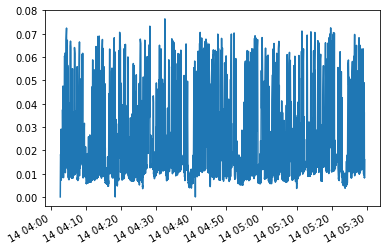

In [120]:
#finding the total distance
    #create plot to visually inspect any outliers
rr_2016_dist.plot(kind='line')
    #conclusion from plot
print("From the graphical representation of the distance covered between each GPS co-ordinates recoreded, we can say there are no datapoints of consern being outliers")
    #find total distance
rr_2016_dist = rr_2016['distance']
print("With the use of compound addition of the distance between each GPS data point, we can determine the total distance traveled to be: " + str(sum(rr_2016_dist)) + (" KM"))

> Speed

For our out analysis of the speed data we will first graph the raw data to visualy inspect for outliers

Text(0, 0.5, 'Speed (KMPH)')

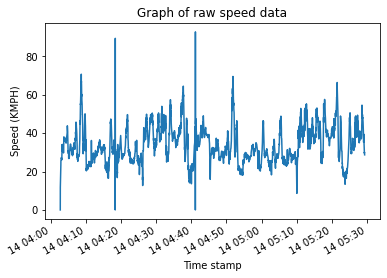

In [131]:
#graphing speed data to identify outliers
rr_2016_speed = rr_2016['speed']
rr_2016_speed.plot(kind='line')
plt.title("Graph of raw speed data")
plt.xlabel("Time stamp")
plt.ylabel("Speed (KMPH)")

From a visual inspection of the graphical data, we can determine that there are some outliers. This means we need to do a couple of things:


> * Convert dictionary to an array.
> * Calculate the upper and lower bounds using Inter Quartile Range (IQR).
> * Drop values above upper bound and below lower bounds.
> * Visually inspect graph to confirm values were dropped.
> * Utilise descriptive statistics to find max, min and average speeds of ride.

Upper bound value: 67.18779655322139
Lower bound value: 2.3391700145232015
Average Speed: 34.89352929484383 KMPH
Standard Devidation: 10.5253779085405
Min Speed: 8.62340892533519
Max Speed: 66.93246613791685


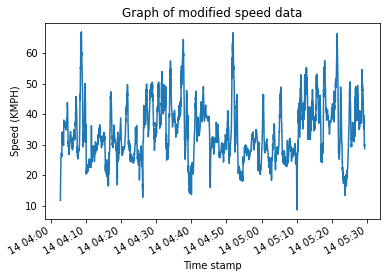

In [245]:
#converting dictionary to an array
result = rr_2016_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1 = np.percentile(rr_2016_speed, 25, interpolation = 'midpoint')
Q3 = np.percentile(rr_2016_speed, 75, interpolation = 'midpoint')
IQR = Q3 - Q1

#upper bound
print("Upper bound value: " + str(Q3+1.5*IQR))

#lower bound 
print("Lower bound value: " + str(Q1-1.5*IQR))

# drop values
rr_2016_speed_drop = rr_2016.drop( rr_2016.index[(rr_2016['speed'] <= (Q1-1.5*IQR)) | (rr_2016['speed'] >= (Q3+1.5*IQR))])

# simplify for analysis
rr_2016_speed_dropped = rr_2016_speed_drop['speed']

# graph speed data with removed outliers
rr_2016_speed_dropped.plot()
plt.title("Graph of modified speed data")
plt.xlabel("Time stamp")
plt.ylabel("Speed (KMPH)")

# simplify descriptive stats
print("Average Speed: " +  str(rr_2016_speed_dropped.mean()) + " KMPH")
print("Standard Devidation: " + str(np.std(rr_2016_speed_dropped)))
print("Min Speed: " + str(min(rr_2016_speed_dropped)))
print("Max Speed: " + str(max(rr_2016_speed_dropped)))

> Elevation

count    2822.000000
mean      232.404465
std        29.725934
min       176.000000
25%       209.450000
50%       226.100000
75%       258.200000
max       295.800000
Name: elevation, dtype: float64

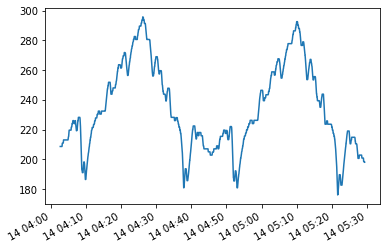

In [265]:
rr_2016_ev = rr_2016['elevation']
rr_2016_ev.plot()
rr_2016_ev.describe()

In [264]:
print("From the data represented above in the graph on Elevation during the race, we can determine that there are no unussual data points (outliers). All data points fell within the trend of the points surrounding it.")
print("Summary of data:")
print("    Average Elevation: " + str(rr_2016_ev.mean()))
print("    Max Elevation: " + str(max(rr_2016_ev)))
print("    Min Elevation: " + str(min(rr_2016_ev)))
print("    Standard Deviation: " + str(np.std(rr_2016_ev)))

From the data represented above in the graph on Elevation during the race, we can determine that there are no unussual data points (outliers). All data points fell within the trend of the points surrounding it.
Summary of data:
    Average Elevation: 232.40446491849806
    Max Elevation: 295.8
    Min Elevation: 176.0
    Standard Deviation: 29.720666852870508


> Elevation Gain

finding elevation gain. to do this we need to:
> * remove outliers
> * remove values sub 0 to give all possitive values
> * use describe function to give count. 
> * count will give total eval gain

<AxesSubplot:>

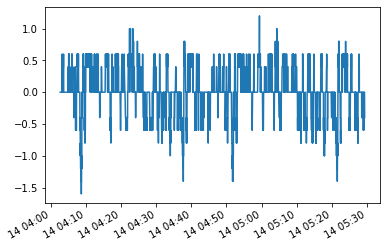

In [252]:
rr_2016_eg = rr_2016['elevation_gain']
rr_2016_eg.plot()

In [253]:
rr_2016_eg.describe()

count    2822.000000
mean       -0.003756
std         0.458872
min        -1.600000
25%        -0.400000
50%         0.000000
75%         0.400000
max         1.200000
Name: elevation_gain, dtype: float64

In [259]:
#converting dictionary to an array
result = rr_2016_eg.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_eg = np.percentile(rr_2016_eg, 25, interpolation = 'midpoint')
Q3_eg = np.percentile(rr_2016_eg, 75, interpolation = 'midpoint')
IQR_eg = Q3_eg - Q1_eg

#upper bound
print("Upper bound value: " + str(Q3_eg+1.5*IQR_eg))

#lower bound 
print("Lower bound value: " + str(Q1_eg-1.5*IQR_eg))

# drop values
rr_2016_eg_drop = rr_2016.drop( rr_2016.index[(rr_2016['elevation_gain'] < (Q1_eg-1.5*IQR_eg)) | (rr_2016['elevation_gain'] > (Q3_eg+1.5*IQR_eg))])

# show descriptive stats with removed outliers
rr_2016_eg_dropped = rr_2016_eg_drop['elevation_gain']
rr_2016_eg_dropped.describe()

Upper bound value: 1.6000000000000227
Lower bound value: -1.6000000000000227


count    2822.000000
mean       -0.003756
std         0.458872
min        -1.600000
25%        -0.400000
50%         0.000000
75%         0.400000
max         1.200000
Name: elevation_gain, dtype: float64

From the upper and lower bound values calculated via the Inter Quartile Range method, we attempeted to remove outliers but all data fell within our bounds as shown in the tabel above.

In [261]:
# descibe what we are doing
print("In order to calculate the Total Elevation Gain (TEG), we must drop all EG datapoints that are negative")

# drop values
rr_2016_teg_drop = rr_2016.drop( rr_2016.index[(rr_2016['elevation_gain'] < 0)])

# see if drop worked
rr_2016_teg_dropped = rr_2016_teg_drop['elevation_gain']
rr_2016_teg_dropped.describe()

In order to calculate the Total Elevation Gain (TEG), we must drop all EG datapoints that are negative


count    1897.000000
mean        0.271481
std         0.233469
min         0.000000
25%         0.000000
50%         0.400000
75%         0.400000
max         1.200000
Name: elevation_gain, dtype: float64

In [262]:
teg_sum = sum(rr_2016_teg_drop['elevation_gain'])
print("Total Elevation Gain: " + str(teg_sum))

Total Elevation Gain: 514.9999999999949


> Heart Rate (HR)

count    2822.000000
mean      158.394401
std        11.304588
min       102.000000
25%       151.000000
50%       158.000000
75%       166.000000
max       205.000000
Name: hr, dtype: float64

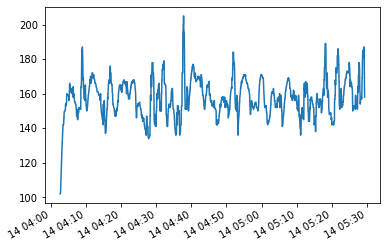

In [173]:
rr_2016_hr = rr_2016['hr']
rr_2016_hr.plot()
rr_2016_hr.describe()

In [192]:
print("From the graph above on Heart Rate (HR), I can vissually assess that there are no data-points out of the ordinary (outliers). Having a low HR of " + str(min(rr_2016_hr)) + " at the beginning of a race is quite normal, especially with a rise to a little above average soon after the start. The spike to " + str(max(rr_2016_hr)) + " during the race was also matched with a significant increase in speed, along with its progressive increase, this is also not out of the ordinary. From the data-set we were able to find that the average hr was " + str(rr_2016_hr.mean()) + " which again is roughly what we would expect from an intense physical activity such as cycling over a long duration of time.")
print("In summation: ")
print("    Min HR: " + str(min(rr_2016_hr)))
print("    Max HR: " + str(max(rr_2016_hr)))
print("    Average (Mean): " + str(rr_2016_hr.mean()))
print("    Standard Deviation: " + str(np.std(rr_2016_hr)))

From the graph above on Heart Rate (HR), I can vissually assess that there are no data-points out of the ordinary (outliers). Having a low HR of 102.0 at the beginning of a race is quite normal, especially with a rise to a little above average soon after the start. The spike to 205.0 during the race was also matched with a significant increase in speed, along with its progressive increase, this is also not out of the ordinary. From the data-set we were able to find that the average hr was 158.39440113394755 which again is roughly what we would expect from an intense physical activity such as cycling over a long duration of time.
In summation: 
    Min HR: 102.0
    Max HR: 205.0
    Average (Mean): 158.39440113394755
    Standard Deviation: 11.302584508066412


> Temperature

<AxesSubplot:>

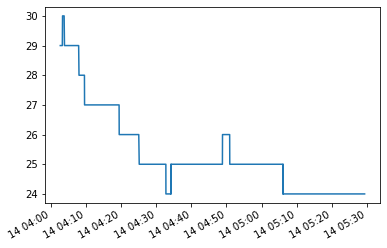

In [263]:
rr_2016_temp = rr_2016['temperature']
rr_2016_temp.plot()

In [209]:
a = rr_2016_temp > 29
a.describe()

count      2822
unique        2
top       False
freq       2810
Name: temperature, dtype: object

In [785]:
print("From the data above on tempreture from the race, we found there to be no outliers. Although we do see a spike to " + str(max(rr_2016_temp)) + " degrees early on, this represents 12 data points and is not a massive jump from the data values surrounding it. Therefore, we can conclude that the data dosen't contain unusual results (outliers).")
print("Summary of temp data:")
print("    Min temp: " + str(min(rr_2016_temp)))
print("    Max temp: " + str(max(rr_2016_temp)))
print("    Average (Mean): " + str(rr_2016_temp.mean()))
print("    Standard Deviation: " + str(np.std(rr_2016_temp)))


From the data above on tempreture from the race, we found there to be no outliers. Although we do see a spike to 30.0 degrees early on, this represents 12 data points and is not a massive jump from the data values surrounding it. Therefore, we can conclude that the data dosen't contain unusual results (outliers).
Summary of temp data:
    Min temp: 24.0
    Max temp: 30.0
    Average (Mean): 25.280652019844084
    Standard Deviation: 1.3485067469584142


**Summary**

In [274]:
print("Below is a summation of the findings above for the Road Race data dated 2016:")
print("Distance:")
print("    Total: " + str(sum(rr_2016_dist)) + (" KM"))
print("Speed:")
print("    Average: " +  str(rr_2016_speed_dropped.mean()) + " KMPH")
print("    Max: " + str(max(rr_2016_speed_dropped)) + (" KMPH"))
print("    Min: " + str(min(rr_2016_speed_dropped)) + (" KMPH"))
print("Elevation:")
print("    Max: " + str(max(rr_2016_ev)))
print("    Min: " + str(min(rr_2016_ev)))
print("    Elevation Gain: " + str(teg_sum))
print("Heart Rate")
print("    Average (Mean): " + str(rr_2016_hr.mean()) + " BMP")
print("    Max: " + str(max(rr_2016_hr)) + " BMP")
print("    Min: " + str(min(rr_2016_hr)) + " BMP")
print("Tempreture")
print("    Average (Mean): " + str(rr_2016_temp.mean()) + " Degrees")
print("    Max: " + str(max(rr_2016_temp)) + " Degrees")
print("    Min: " + str(min(rr_2016_temp)) + " Degrees")

Below is a summation of the findings above for the Road Race data dated 2016:
Distance:
    Total: 49.04858574628641 KM
Speed:
    Average: 34.89352929484383 KMPH
    Max: 66.93246613791685 KMPH
    Min: 8.62340892533519 KMPH
Elevation:
    Max: 295.8
    Min: 176.0
    Elevation Gain: 514.9999999999949
Heart Rate
    Average (Mean): 158.39440113394755 BMP
    Max: 205.0 BMP
    Min: 102.0 BMP
Tempreture
    Average (Mean): 25.280652019844084 Degrees
    Max: 30.0 Degrees
    Min: 24.0 Degrees


### Time Trial 2016

In [275]:
tt_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0


> Distance

From the graph depicting 'distance', we can see there are anomalous data.


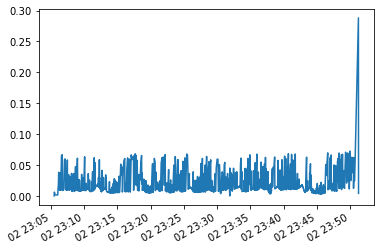

In [292]:
tt_2016_dist = tt_2016['distance']
tt_2016_dist.plot()
print("From the graph depicting 'distance', we can see there are anomalous data.")

In [293]:
tt_2016_dist.describe()

count    1541.000000
mean        0.016095
std         0.015897
min         0.000000
25%         0.007622
50%         0.010974
75%         0.015960
max         0.288175
Name: distance, dtype: float64

In [282]:
#converting dictionary to an array
result = tt_2016_dist.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_t2016_dist = np.percentile(tt_2016_dist, 25, interpolation = 'midpoint')
Q3_t2016_dist = np.percentile(tt_2016_dist, 75, interpolation = 'midpoint')
IQR_t2016_dist = Q3_t2016_dist - Q1_t2016_dist

#upper bound
print("Upper bound value: " + str(Q3_t2016_dist+1.5*IQR_t2016_dist))

#lower bound 
print("Lower bound value: " + str(Q1_t2016_dist-1.5*IQR_t2016_dist))

# drop values
tt_2016_dist_drop = tt_2016.drop( tt_2016.index[(tt_2016['distance'] < (Q1_t2016_dist-1.5*IQR_t2016_dist)) | (tt_2016['distance'] > (Q3_t2016_dist+1.5*IQR_t2016_dist))])

# show descriptive stats with removed outliers
tt_2016_dist_dropped = tt_2016_dist_drop['distance']
tt_2016_dist_dropped.describe()

Upper bound value: 0.02846725437005931
Lower bound value: -0.004885583039429342


count    1328.000000
mean        0.010865
std         0.005079
min         0.000000
25%         0.007151
50%         0.009913
75%         0.013250
max         0.028138
Name: distance, dtype: float64

<AxesSubplot:>

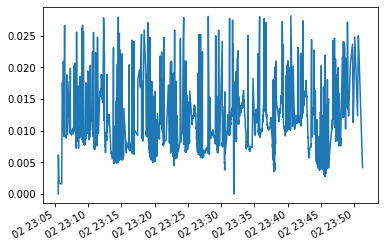

In [286]:
tt_2016_dist_dropped.plot()

In [380]:
print("Total distance covered : " + str(sum(tt_2016_dist_dropped)) + " KM")

Total distance covered : 14.42819988022009 KM


> Speed

count    1541.000000
mean       33.529963
std        11.519681
min         0.000000
25%        25.068271
50%        32.840076
75%        41.470522
max       162.505764
Name: speed, dtype: float64

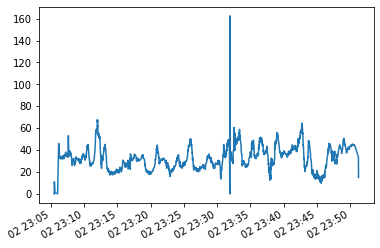

In [298]:
tt_2016_speed = tt_2016['speed']
tt_2016_speed.plot()
tt_2016_speed.describe()

From the speed graph, we can determine there are some outlier data

In [300]:
#converting dictionary to an array
result = tt_2016_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_t2016_speed = np.percentile(tt_2016_speed, 25, interpolation = 'midpoint')
Q3_t2016_speed = np.percentile(tt_2016_speed, 75, interpolation = 'midpoint')
IQR_t2016_speed = Q3_t2016_speed - Q1_t2016_speed

#upper bound
print("Upper bound value: " + str(Q3_t2016_speed+1.5*IQR_t2016_speed))

#lower bound 
print("Lower bound value: " + str(Q1_t2016_speed-1.5*IQR_t2016_speed))

# drop values
tt_2016_speed_drop = tt_2016.drop( tt_2016.index[(tt_2016['speed'] < (Q1_t2016_speed-1.5*IQR_t2016_speed)) | (tt_2016['speed'] > (Q3_t2016_speed+1.5*IQR_t2016_speed))])

# show descriptive stats with removed outliers
tt_2016_speed_dropped = tt_2016_speed_drop['speed']
tt_2016_speed_dropped.describe()

Upper bound value: 66.07389917211357
Lower bound value: 0.46489395233440334


count    1535.000000
mean       33.467068
std        10.894173
min         0.991282
25%        25.077717
50%        32.840076
75%        41.428555
max        65.840624
Name: speed, dtype: float64

In [306]:
print("With our cleaned data, we can determin the following:")
print("    Average Speed: " + str(tt_2016_speed_dropped.mean()) + " KM/H")
print("    Max Speed: " + str(max(tt_2016_speed_dropped)) + "KM/H")
print("    Min Speed: " + str(min(tt_2016_speed_dropped)) + "KM/H")
print("    Standard Devidation: " + str(np.std(tt_2016_speed_dropped)))

With our cleaned data, we can determin the following:
    Average Speed: 33.46706828901973 KM/H
    Max Speed: 65.84062431415376KM/H
    Min Speed: 0.9912815096822482KM/H
    Standard Devidation: 10.890624114253193


> Elevation

count    1541.000000
mean      139.068657
std        30.301132
min        85.000000
25%       116.200000
50%       134.000000
75%       165.400000
max       202.600000
Name: elevation, dtype: float64

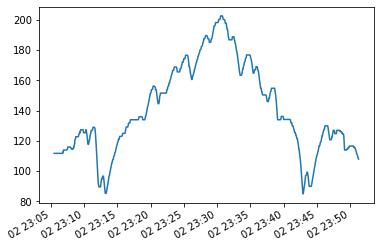

In [322]:
tt_2016_ev = tt_2016['elevation']
tt_2016_ev.plot()
tt_2016_ev.describe()

From the graphical representation of the elevation data from the 2016 time trial event, we can determine that there are no datapoints out of the ordinary.

In [784]:
print("Summary of data:")
print("    Average Elevation: " + str(tt_2016_ev.mean()))
print("    Max Elevation: " + str(max(tt_2016_ev)))
print("    Min Elevation: " + str(min(tt_2016_ev)))
print("    Standard Deviation: " + str(np.std(tt_2016_ev)))

Summary of data:
    Average Elevation: 139.06865671641827
    Max Elevation: 202.6
    Min Elevation: 85.0
    Standard Deviation: 30.291298452203062


> Elevation Gain

count    1541.000000
mean       -0.002466
std         0.515343
min        -7.400000
25%        -0.400000
50%         0.000000
75%         0.400000
max         2.400000
Name: elevation_gain, dtype: float64

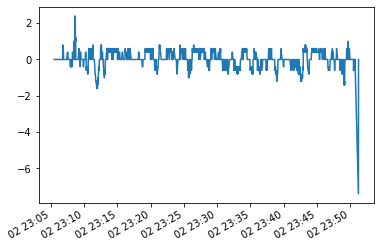

In [324]:
tt_2016_eg = tt_2016['elevation_gain']
tt_2016_eg.plot()
tt_2016_eg.describe()

From the brief overview of the time trial elevation gain data, we can determine there are quite a few outlier data-points.

In [388]:
#converting dictionary to an array
result = tt_2016_eg.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_tt2016_eg = np.percentile(tt_2016_eg, 25, interpolation = 'midpoint')
Q3_tt2016_eg = np.percentile(tt_2016_eg, 75, interpolation = 'midpoint')
IQR_tt2016_eg = Q3_tt2016_eg - Q1_tt2016_eg

#upper bound
print("Upper bound value: " + str(Q3_tt2016_eg+1.5*IQR_tt2016_eg))

#lower bound 
print("Lower bound value: " + str(Q1_tt2016_eg-1.5*IQR_tt2016_eg))

# drop values
tt_2016_eg_drop = tt_2016.drop(tt_2016.index[(tt_2016['elevation_gain'] < (Q1_tt2016_eg-1.5*IQR_tt2016_eg)) | (tt_2016['elevation_gain'] > (Q3_tt2016_eg+1.5*IQR_tt2016_eg))])

# show descriptive stats with removed outliers
tt_2016_eg_dropped = tt_2016_eg_drop['elevation_gain']
tt_2016_eg_dropped.describe()

Upper bound value: 1.6000000000000227
Lower bound value: -1.6000000000000227


count    1539.000000
mean        0.000780
std         0.476004
min        -1.600000
25%        -0.400000
50%         0.000000
75%         0.400000
max         1.200000
Name: elevation_gain, dtype: float64

<AxesSubplot:>

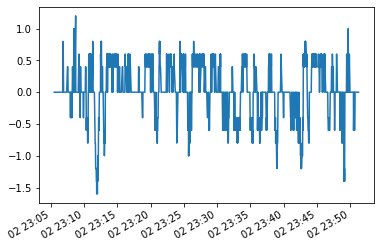

In [348]:
tt_2016_eg_dropped.plot()

In order to find Total Elevation Gain (TEG), we must drop all negative values.

In [783]:
# Dropping negative Elevation Gain values
tt_2016_teg_drop = tt_2016.drop(tt_2016.index[(tt_2016['elevation_gain'] < 0) | (tt_2016['elevation_gain'] > (Q3_tt2016_eg+1.5*IQR_tt2016_eg))])

# Check that droped worked
tt_2016_teg_drop['elevation_gain'].describe()

count    1076.000000
mean        0.265985
std         0.242458
min         0.000000
25%         0.000000
50%         0.400000
75%         0.400000
max         1.200000
Name: elevation_gain, dtype: float64

<AxesSubplot:>

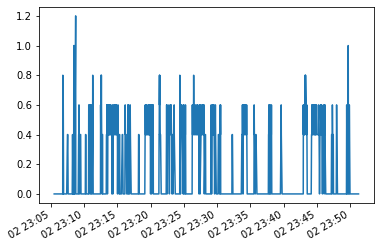

In [352]:
tt_2016_teg_drop['elevation_gain'].plot()

In [353]:
teg_tt2016_sum = sum(tt_2016_teg_drop['elevation_gain'])
print("Total Elevation Gain: " + str(teg_tt2016_sum))

Total Elevation Gain: 286.199999999999


> Heart Rate

<AxesSubplot:>

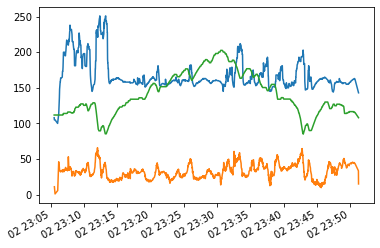

In [357]:
tt_2016_hr = tt_2016['hr']
tt_2016_hr.plot()
tt_2016_speed_dropped.plot()
tt_2016['elevation'].plot()

In [359]:
tt_2016_hr.describe()

count    1541.000000
mean      170.939650
std        23.392548
min       100.000000
25%       157.000000
50%       161.000000
75%       180.000000
max       251.000000
Name: hr, dtype: float64

From visual inspection of the overlay of Heart Rate, Speed data and Elevation (which often have strong relationships), there are some data-ponts of concern. In particular, having a maximum heart rate of above 200 BPM for extended periods of time is very rare. We will use our IQR method to see if any outliers present themselves.

In [360]:
#calculating the IQR
Q1_tt2016_hr = np.percentile(tt_2016_hr, 25, interpolation = 'midpoint')
Q3_tt2016_hr = np.percentile(tt_2016_hr, 75, interpolation = 'midpoint')
IQR_tt2016_hr = Q3_tt2016_hr - Q1_tt2016_hr

#upper bound
print("Upper bound value: " + str(Q3_tt2016_hr+1.5*IQR_tt2016_hr))

#lower bound 
print("Lower bound value: " + str(Q1_tt2016_hr-1.5*IQR_tt2016_hr))

# drop values
tt_2016_hr_drop = tt_2016.drop(tt_2016.index[(tt_2016['hr'] < (Q1_tt2016_hr-1.5*IQR_tt2016_hr)) | (tt_2016['hr'] > (Q3_tt2016_hr+1.5*IQR_tt2016_hr))])

# show descriptive stats with removed outliers
tt_2016_hr_dropped = tt_2016_hr_drop['hr']
tt_2016_hr_dropped.describe()

Upper bound value: 214.5
Lower bound value: 122.5


count    1416.000000
mean      166.461158
std        15.744288
min       125.000000
25%       157.000000
50%       161.000000
75%       172.250000
max       213.000000
Name: hr, dtype: float64

<AxesSubplot:>

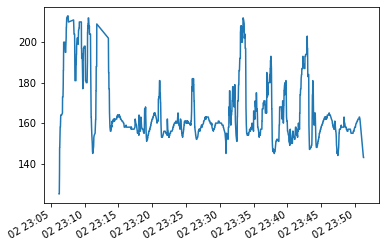

In [361]:
tt_2016_hr_dropped.plot()

Although, we did still have HR data in the 200 BMP and above, we did remove a significant amount of data that seemed unrealistic. Maintaining a HR of above 200 for long periods of time is extreamly difficult and dangerious, even for elite athletes performing at 100% without the onset of muscular fatigue.

In [365]:
print("Below is a summation of the modified Heart Rate Data:")
print("    Average HR (Mean): " + str(tt_2016_hr_dropped.mean()) + " BMP")
print("    Max HR: " + str(max(tt_2016_hr_dropped)) + " BMP")
print("    Min HR: " + str(min(tt_2016_hr_dropped)) + " BMP")

Although, we did still have HR data in the 200 BMP and above, we did remove a significant amount of data that seemed unrealistic. Maintaining a HR of above 200 for long periods of time is extreamly difficult and dangerious, even for elite athletes performing at 100% without the onset of muscular fatigue.
Below is a summation of the modified Heart Rate Data:
    Average HR (Mean): 166.4611581920904 BMP
    Max HR: 213.0 BMP
    Min HR: 125.0 BMP


> Tempreture

<AxesSubplot:>

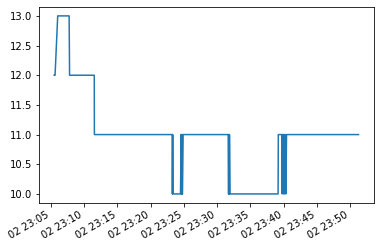

In [371]:
tt_2016_temp = tt_2016['temperature']
tt_2016_temp.plot()

In [372]:
tt_2016_temp.describe()

count    1541.000000
mean       10.953277
std         0.657937
min        10.000000
25%        11.000000
50%        11.000000
75%        11.000000
max        13.000000
Name: temperature, dtype: float64

Although temperature data dosent have any randical temperature changes, there are occilations. It is worth doing a IQR test to identify outliers, if any.

Upper bound value: 11.0
Lower bound value: 11.0


<AxesSubplot:>

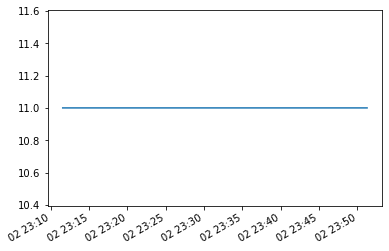

In [376]:
#calculating the IQR
Q1_tt2016_temp = np.percentile(tt_2016_temp, 25, interpolation = 'midpoint')
Q3_tt2016_temp = np.percentile(tt_2016_temp, 75, interpolation = 'midpoint')
IQR_tt2016_temp = Q3_tt2016_temp - Q1_tt2016_temp

#upper bound
print("Upper bound value: " + str(Q3_tt2016_temp+1.5*IQR_tt2016_temp))

#lower bound 
print("Lower bound value: " + str(Q1_tt2016_temp-1.5*IQR_tt2016_temp))

# drop values
tt_2016_temp_drop = tt_2016.drop(tt_2016.index[(tt_2016['temperature'] < (Q1_tt2016_temp-1.5*IQR_tt2016_temp)) | (tt_2016['temperature'] > (Q3_tt2016_temp+1.5*IQR_tt2016_temp))])

# show descriptive stats with removed outliers
tt_2016_temp_dropped = tt_2016_temp_drop['temperature']
tt_2016_temp_dropped.plot()

In [378]:
print("Using the IQR method was not very usefull, thus should be disregarded and the orginal data-set be re-instated.")
print("The following summation of findings are based on the orginal temperature data:")
print("    Average (Mean): " + str(tt_2016_temp.mean()) + " Degrees")
print("    Max: " + str(max(tt_2016_temp)) + " Degrees")
print("    Min: " + str(min(tt_2016_temp)) + " Degrees")

Using the IQR method was not very usefull, thus should be disregarded and the orginal data-set be re-instated.
The following summation of findings are based on the orginal temperature data:
    Average (Mean): 10.953277092796885 Degrees
    Max: 13.0 Degrees
    Min: 10.0 Degrees


**Sumary**

In [384]:
print("Below is a summation of the findings above for the Time Trial data dated 2016:")
print("Distance:")
print("    Total: " + str(sum(tt_2016_dist_dropped)) + (" KM"))
print("Speed:")
print("    Average: " +  str(tt_2016_speed_dropped.mean()) + " KMPH")
print("    Max: " + str(max(tt_2016_speed_dropped)) + (" KMPH"))
print("    Min: " + str(min(tt_2016_speed_dropped)) + (" KMPH"))
print("    Standard Devidation: " + str(np.std(tt_2016_speed_dropped)))
print("Elevation:")
print("    Max: " + str(max(tt_2016_ev)))
print("    Min: " + str(min(tt_2016_ev)))
print("    Elevation Gain: " + str(teg_tt2016_sum))
print("    Average Elevation: " + str(tt_2016_ev.mean()))
print("Heart Rate")
print("    Average (Mean): " + str(tt_2016_hr_dropped.mean()) + " BMP")
print("    Max: " + str(max(tt_2016_hr_dropped)) + " BMP")
print("    Min: " + str(min(tt_2016_hr_dropped)) + " BMP")
print("Temperature")
print("    Average (Mean): " + str(tt_2016_temp.mean()) + " Degrees")
print("    Max: " + str(max(tt_2016_temp)) + " Degrees")
print("    Min: " + str(min(tt_2016_temp)) + " Degrees")

Below is a summation of the findings above for the Time Trial data dated 2016:
Distance:
    Total: 14.42819988022009 KM
Speed:
    Average: 33.46706828901973 KMPH
    Max: 65.84062431415376 KMPH
    Min: 0.9912815096822482 KMPH
    Standard Devidation: 10.890624114253193
Elevation:
    Max: 202.6
    Min: 85.0
    Elevation Gain: 286.199999999999
    Average Elevation: 139.06865671641827
Heart Rate
    Average (Mean): 166.4611581920904 BMP
    Max: 213.0 BMP
    Min: 125.0 BMP
Temperature
    Average (Mean): 10.953277092796885 Degrees
    Max: 13.0 Degrees
    Min: 10.0 Degrees


### Road Race 2019

In [385]:
rr_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0


> Distance

count    5503.000000
mean        0.009411
std         0.002459
min         0.000000
25%         0.007839
50%         0.009178
75%         0.010733
max         0.019547
Name: distance, dtype: float64

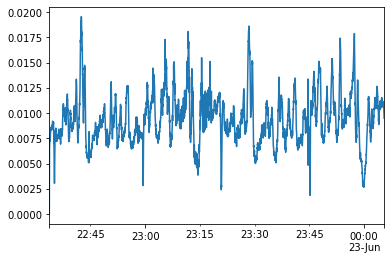

In [386]:
rr_2019_dist = rr_2019['distance']
rr_2019_dist.plot()
rr_2019_dist.describe()

From vissual analysis of the graphical representation of distance data, there are significant jumps between data-sets. This gives the impression there are outlier data present.

In [391]:
#converting dictionary to an array
result = rr_2019_dist.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_rr2019_dist = np.percentile(rr_2019_dist, 25, interpolation = 'midpoint')
Q3_rr2019_dist = np.percentile(rr_2019_dist, 75, interpolation = 'midpoint')
IQR_rr2019_dist = Q3_rr2019_dist - Q1_rr2019_dist

#upper bound
print("Upper bound value: " + str(Q3_rr2019_dist+1.5*IQR_rr2019_dist))

#lower bound 
print("Lower bound value: " + str(Q1_rr2019_dist-1.5*IQR_rr2019_dist))

# drop values
rr_2019_dist_drop = rr_2019.drop(rr_2019.index[(rr_2019['distance'] < (Q1_rr2019_dist-1.5*IQR_rr2019_dist)) | (rr_2019['distance'] > (Q3_rr2019_dist+1.5*IQR_rr2019_dist))])

# show descriptive stats with removed outliers
rr_2019_dist_dropped = rr_2019_dist_drop['distance']
rr_2019_dist_dropped.describe()

Upper bound value: 0.015075034259741035
Lower bound value: 0.003497184702708628


count    5316.000000
mean        0.009278
std         0.002101
min         0.003650
25%         0.007839
50%         0.009125
75%         0.010633
max         0.015075
Name: distance, dtype: float64

<AxesSubplot:>

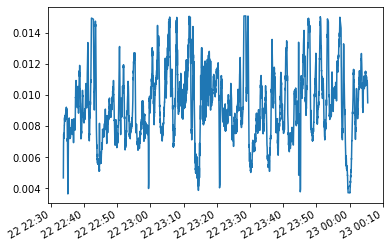

In [392]:
rr_2019_dist_dropped.plot()

In [782]:
print("From the cleaned data set, we can find the following:")
print("Total distance covered in the 2019 Road Race: " + str(sum(rr_2019_dist_dropped)) + " KM")

From the cleaned data set, we can find the following:
Total distance covered in the 2019 Road Race: 49.32132646227818 KM


> Speed

count    5503.000000
mean       33.879861
std         8.853503
min         0.000000
25%        28.219962
50%        33.041360
75%        38.640026
max        70.370469
Name: speed, dtype: float64

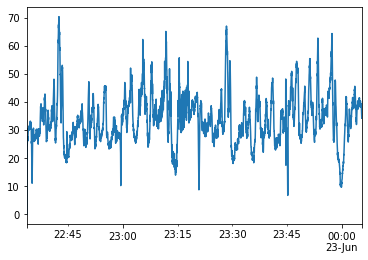

In [397]:
rr_2019_speed = rr_2019['speed']
rr_2019_speed.plot()
rr_2019_speed.describe()

From the above graphical analysis of speed data, we can see significant jumps in data-points. This gives the impression there may be outliers.

In [399]:
#converting dictionary to an array
result = rr_2019_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_rr2019_speed = np.percentile(rr_2019_speed, 25, interpolation = 'midpoint')
Q3_rr2019_speed = np.percentile(rr_2019_speed, 75, interpolation = 'midpoint')
IQR_rr2019_speed = Q3_rr2019_speed - Q1_rr2019_speed

#upper bound
print("Upper bound value: " + str(Q3_rr2019_speed+1.5*IQR_rr2019_speed))

#lower bound 
print("Lower bound value: " + str(Q1_rr2019_speed-1.5*IQR_rr2019_speed))

# drop values
rr_2019_speed_drop = rr_2019.drop(rr_2019.index[(rr_2019['speed'] < (Q1_rr2019_speed-1.5*IQR_rr2019_speed)) | (rr_2019['speed'] > (Q3_rr2019_speed+1.5*IQR_rr2019_speed))])

# show descriptive stats with removed outliers
rr_2019_speed_dropped = rr_2019_speed_drop['speed']
rr_2019_speed_dropped.describe()

Upper bound value: 54.27012333506772
Lower bound value: 12.589864929751062


count    5316.000000
mean       33.400447
std         7.565346
min        13.138501
25%        28.220026
50%        32.851363
75%        38.277136
max        54.268473
Name: speed, dtype: float64

<AxesSubplot:>

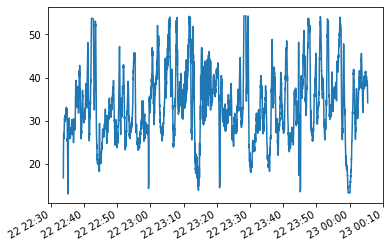

In [400]:
rr_2019_speed_dropped.plot()

In [401]:
print("From the cleaned speed data, we can find the following:")
print("    Average: " +  str(rr_2019_speed_dropped.mean()) + " KMPH")
print("    Max: " + str(max(rr_2019_speed_dropped)) + (" KMPH"))
print("    Min: " + str(min(rr_2019_speed_dropped)) + (" KMPH"))
print("    Standard Devidation: " + str(np.std(rr_2019_speed_dropped)))

From the cleaned speed data, we can find the following:
    Average: 33.400446814183866 KMPH
    Max: 54.26847256870253 KMPH
    Min: 13.138501394084688 KMPH
    Standard Devidation: 7.5646346154411335


> Elevation

count    5503.000000
mean      243.243576
std        30.197981
min       185.200000
25%       219.600000
50%       236.000000
75%       269.600000
max       310.400000
Name: elevation, dtype: float64

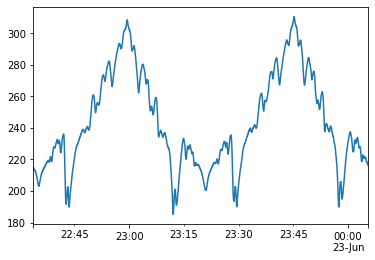

In [402]:
rr_2019_ev = rr_2019['elevation']
rr_2019_ev.plot()
rr_2019_ev.describe()

In [403]:
print("From the data set above, no datapoints seem out of the ordinary. Thus, we can calculate:")
print("    Max elevation: " + str(max(rr_2019_ev)))
print("    Min elevation: " + str(min(rr_2019_ev)))
print("    Average Elevation: " + str(rr_2019_ev.mean()))

From the data set above, no datapoints seem out of the ordinary. Thus, we can calculate:
    Max elevation: 310.4
    Min elevation: 185.2
    Average Elevation: 243.24357623114642


> Elevation Gain

count    5503.000000
mean        0.000254
std         0.347322
min        -2.000000
25%        -0.200000
50%         0.000000
75%         0.200000
max         1.000000
Name: elevation_gain, dtype: float64

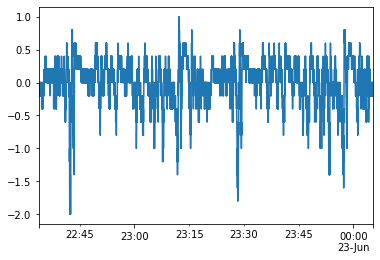

In [404]:
rr_2019_eg = rr_2019['elevation_gain']
rr_2019_eg.plot()
rr_2019_eg.describe()

From the analysis above, we can see very large jumps in data, suggesting there are outliers present.

In [406]:
#converting dictionary to an array
result = rr_2019_eg.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_rr2019_eg = np.percentile(rr_2019_eg, 25, interpolation = 'midpoint')
Q3_rr2019_eg = np.percentile(rr_2019_eg, 75, interpolation = 'midpoint')
IQR_rr2019_eg = Q3_rr2019_eg - Q1_rr2019_eg

#upper bound
print("Upper bound value: " + str(Q3_rr2019_eg+1.5*IQR_rr2019_eg))

#lower bound 
print("Lower bound value: " + str(Q1_rr2019_eg-1.5*IQR_rr2019_eg))

# drop values
rr_2019_eg_drop = rr_2019.drop(rr_2019.index[(rr_2019['elevation_gain'] < (Q1_rr2019_eg-1.5*IQR_rr2019_eg)) | (rr_2019['elevation_gain'] > (Q3_rr2019_eg+1.5*IQR_rr2019_eg))])

# show descriptive stats with removed outliers
rr_2019_eg_dropped = rr_2019_eg_drop['elevation_gain']
rr_2019_eg_dropped.describe()

Upper bound value: 0.8000000000000256
Lower bound value: -0.7999999999999972


count    5334.000000
mean        0.035096
std         0.284584
min        -0.800000
25%        -0.200000
50%         0.000000
75%         0.200000
max         0.800000
Name: elevation_gain, dtype: float64

In order to find Total Elevation Gain, we must remove datapoints with a value below zero.

<AxesSubplot:>

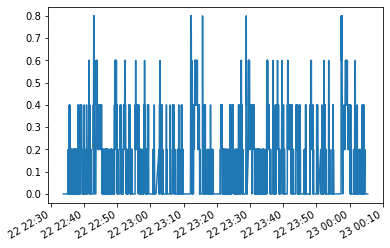

In [409]:
# dropp values
rr_2019_eg_drop_pos = rr_2019.drop(rr_2019.index[(rr_2019['elevation_gain'] < 0) | (rr_2019['elevation_gain'] > (Q3_rr2019_eg+1.5*IQR_rr2019_eg))])

# show descriptive stats with removed outliers
rr_2019_eg_dropped_pos = rr_2019_eg_drop_pos['elevation_gain']
rr_2019_eg_dropped_pos.describe()
rr_2019_eg_dropped_pos.plot()

In [428]:
rr_2019_teg_sum = sum(rr_2019_eg_dropped_pos)
print("Total Elevation Gain: " + str(rr_2019_teg_sum))

Total Elevation Gain: 686.2000000000078


> Heart Rate

count    5503.000000
mean      138.998546
std        16.184123
min        71.000000
25%       129.000000
50%       142.000000
75%       152.000000
max       170.000000
Name: hr, dtype: float64

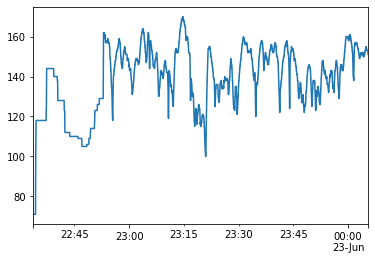

In [415]:
rr_2019_hr = rr_2019['hr']
rr_2019_hr.plot()
rr_2019_hr.describe()

From the graphical analysis above, there are some datapoints that stray from the norm.

In [420]:
#converting dictionary to an array
result = rr_2019_hr.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_rr2019_hr = np.percentile(rr_2019_hr, 25, interpolation = 'midpoint')
Q3_rr2019_hr = np.percentile(rr_2019_hr, 75, interpolation = 'midpoint')
IQR_rr2019_hr = Q3_rr2019_hr - Q1_rr2019_hr

# drop values
rr_2019_hr_drop = rr_2019.drop(rr_2019.index[(rr_2019['hr'] < (Q1_rr2019_hr-1.5*IQR_rr2019_hr)) | (rr_2019['hr'] > (Q3_rr2019_hr+1.5*IQR_rr2019_hr))])

# show descriptive stats with removed outliers
rr_2019_hr_dropped = rr_2019_hr_drop['hr']
rr_2019_hr_dropped.describe()

count    5464.000000
mean      139.476574
std        15.212480
min       100.000000
25%       129.000000
50%       142.000000
75%       152.000000
max       170.000000
Name: hr, dtype: float64

<AxesSubplot:>

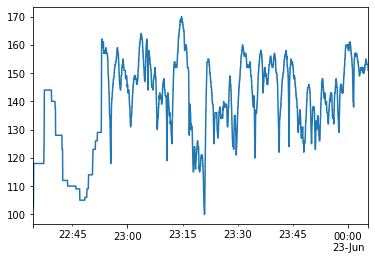

In [421]:
rr_2019_hr_dropped.plot()

In [422]:
print("Summation of Heart Rate data using cleaned data-set:")
print("    Average (Mean): " + str(rr_2019_hr_dropped.mean()) + " BMP")
print("    Max: " + str(max(rr_2019_hr_dropped)) + " BMP")
print("    Min: " + str(min(rr_2019_hr_dropped)) + " BMP")

Summation of Heart Rate data using cleaned data-set:
    Average (Mean): 139.4765739385066 BMP
    Max: 170.0 BMP
    Min: 100.0 BMP


> Temperature

count    5503.000000
mean        5.997819
std         0.806414
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         7.000000
Name: temperature, dtype: float64

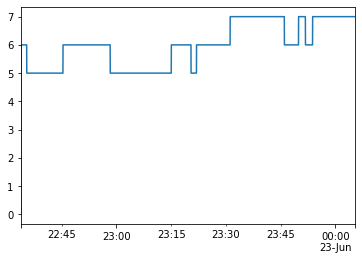

In [424]:
rr_2019_temp = rr_2019['temperature']
rr_2019_temp.plot()
rr_2019_temp.describe()

In [425]:
print("From the graphical and descriptive data above, there dosen't seem to be any data-points out of the ordinary. Thus, we can conclude that:")
print("    Average (Mean): " + str(rr_2019_temp.mean()) + " Degrees")
print("    Max: " + str(max(rr_2019_temp)) + " Degrees")
print("    Min: " + str(min(rr_2019_temp)) + " Degrees")

From the graphical and descriptive data above, there dosen't seem to be any data-points out of the ordinary. Thus, we can conclude that:
    Average (Mean): 5.997819371252044 Degrees
    Max: 7.0 Degrees
    Min: 0.0 Degrees


> Power

count    5503.000000
mean      213.617845
std       144.123686
min         0.000000
25%       104.000000
50%       212.000000
75%       308.000000
max       785.000000
Name: power, dtype: float64

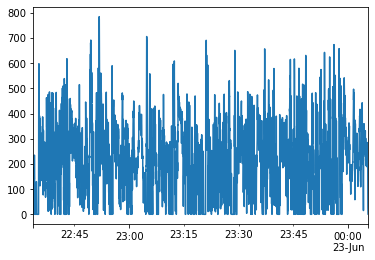

In [426]:
rr_2019_pw = rr_2019['power']
rr_2019_pw.plot()
rr_2019_pw.describe()

**Sumary**

In [431]:
print("Below is a summation of the findings above for the Road Race data dated 2019:")
print("Distance:")
print("    Total: " + str(sum(rr_2019_dist_dropped)) + (" KM"))
print("Speed:")
print("    Average: " +  str(rr_2019_speed_dropped.mean()) + " KMPH")
print("    Max: " + str(max(rr_2019_speed_dropped)) + (" KMPH"))
print("    Min: " + str(min(rr_2019_speed_dropped)) + (" KMPH"))
print("    Standard Devidation: " + str(np.std(rr_2019_speed_dropped)))
print("Elevation:")
print("    Max: " + str(max(rr_2019_ev)))
print("    Min: " + str(min(rr_2019_ev)))
print("    Elevation Gain: " + str(rr_2019_teg_sum))
print("    Average Elevation: " + str(rr_2019_ev.mean()))
print("Heart Rate")
print("    Average (Mean): " + str(rr_2019_hr_dropped.mean()) + " BMP")
print("    Max: " + str(max(rr_2019_hr_dropped)) + " BMP")
print("    Min: " + str(min(rr_2019_hr_dropped)) + " BMP")
print("Temperature")
print("    Average (Mean): " + str(rr_2019_temp.mean()) + " Degrees")
print("    Max: " + str(max(rr_2019_temp)) + " Degrees")
print("    Min: " + str(min(rr_2019_temp)) + " Degrees")

Below is a summation of the findings above for the Road Race data dated 2019:
Distance:
    Total: 49.32132646227818 KM
Speed:
    Average: 33.400446814183866 KMPH
    Max: 54.26847256870253 KMPH
    Min: 13.138501394084688 KMPH
    Standard Devidation: 7.5646346154411335
Elevation:
    Max: 310.4
    Min: 185.2
    Elevation Gain: 686.2000000000078
    Average Elevation: 243.24357623114642
Heart Rate
    Average (Mean): 139.4765739385066 BMP
    Max: 170.0 BMP
    Min: 100.0 BMP
Temperature
    Average (Mean): 5.997819371252044 Degrees
    Max: 7.0 Degrees
    Min: 0.0 Degrees


### Time Trial 2019

In [433]:
tt_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2654.0
mean,-33.368391,151.225397,250.435104,10.194350,257.566855,89.979661,152.741243,0.009183,0.000377,33.057824,1.0
std,0.028682,0.006234,29.434104,0.833934,80.023555,17.543883,8.217632,0.002715,0.298628,9.773522,0.0
min,-33.415798,151.211507,195.800000,9.000000,0.000000,0.000000,88.000000,0.000000,-1.600000,0.000000,1.0
25%,-33.394910,151.221400,229.200000,10.000000,213.500000,88.000000,150.000000,0.007345,-0.200000,26.440757,1.0
50%,-33.370118,151.227363,243.800000,10.000000,264.000000,94.000000,153.000000,0.009228,0.000000,33.220108,1.0
75%,-33.343803,151.230040,276.200000,10.000000,308.000000,98.000000,158.000000,0.010913,0.200000,39.286242,1.0
max,-33.316882,151.235098,312.200000,13.000000,522.000000,111.000000,166.000000,0.017584,0.600000,63.300734,1.0


In [451]:
tt_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0


In [452]:
tt_2019.tail()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0
2019-06-01 23:39:09+00:00,-33.415648,151.222255,220.4,10.0,154.0,73.0,166.0,0.012019,0.0,43.269479,1.0


> Distance

count    5503.000000
mean        0.009411
std         0.002459
min         0.000000
25%         0.007839
50%         0.009178
75%         0.010733
max         0.019547
Name: distance, dtype: float64

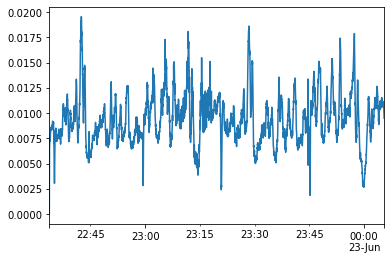

In [444]:
tt_2019_dist = rr_2019['distance']
tt_2019_dist.plot()
tt_2019_dist.describe()

From the graph above, we can see that there are large jumps between data-sets. Due to this, we will use a IQR analysis to identify and remove any anomolous data.

In [448]:
#converting dictionary to an array
result = tt_2019_dist.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_tt2019_dist = np.percentile(tt_2019_dist, 25, interpolation = 'midpoint')
Q3_tt2019_dist = np.percentile(tt_2019_dist, 75, interpolation = 'midpoint')
IQR_tt2019_dist = Q3_tt2019_dist - Q1_tt2019_dist

# drop values
tt_2019_dist_drop = tt_2019.drop(tt_2019.index[(tt_2019['distance'] < (Q1_tt2019_dist-1.5*IQR_tt2019_dist)) | (tt_2019['distance'] > (Q3_tt2019_dist+1.5*IQR_tt2019_dist))])

# show descriptive stats with removed outliers
tt_2019_dist_dropped = tt_2019_dist_drop['distance']
tt_2019_dist_dropped.describe()

count    2583.000000
mean        0.009093
std         0.002488
min         0.003564
25%         0.007355
50%         0.009202
75%         0.010795
max         0.015019
Name: distance, dtype: float64

<AxesSubplot:>

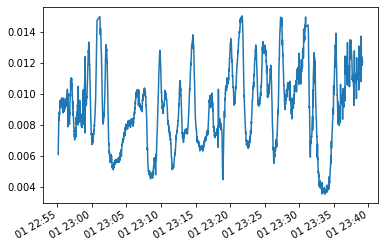

In [449]:
tt_2019_dist_dropped.plot()

In [468]:
# Finding total distance with cleaned data
print("Total distance for time trial 2019 is " + str(sum(tt_2019_dist_dropped)) + " KM")

Total distance for time trial 2019 is 23.48678381039439 KM


> Speed

count    2655.000000
mean       33.057824
std         9.773522
min         0.000000
25%        26.440757
50%        33.220108
75%        39.286242
max        63.300734
Name: speed, dtype: float64

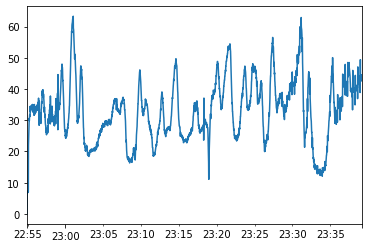

In [469]:
tt_2019_speed = tt_2019['speed']
tt_2019_speed.plot()
tt_2019_speed.describe()

From the graph above, we can determine that there are no data-points of concern. All data points are within a realistic range and are colerating with the trends surrounding them.

In [474]:
print("From the speed data, we can find the following:")
print("    Average: " +  str(tt_2019_speed.mean()) + " KMPH")
print("    Max: " + str(max(tt_2019_speed)) + (" KMPH"))
print("    Min: " + str(min(tt_2019_speed)) + (" KMPH"))
print("    Standard Devidation: " + str(np.std(tt_2019_speed)))

From the graph above, we can determine that there are no data-points of concern. All data points are within a realistic range and are colerating with the trends surrounding them.
From the speed data, we can find the following:
    Average: 33.05782378815691 KMPH
    Max: 63.300734121945005 KMPH
    Min: 0.0 KMPH
    Standard Devidation: 9.771680920602345


> Elevation

count    2655.000000
mean      250.435104
std        29.434104
min       195.800000
25%       229.200000
50%       243.800000
75%       276.200000
max       312.200000
Name: elevation, dtype: float64

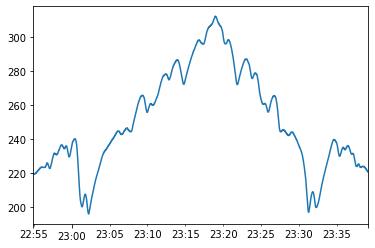

In [472]:
tt_2019_ev = tt_2019['elevation']
tt_2019_ev.plot()
tt_2019_ev.describe()

In [475]:
print("From the elevation graph above, we can determine that there are no datapoints of concern (being outliers)")
print("    Max elevation: " + str(max(tt_2019_ev)))
print("    Min elevation: " + str(min(tt_2019_ev)))
print("    Average Elevation: " + str(tt_2019_ev.mean()))

From the elevation graph above, we can determine that there are no datapoints of concern (being outliers)
    Max elevation: 312.2
    Min elevation: 195.8
    Average Elevation: 250.435103578155


> Elevation Gain

<AxesSubplot:>

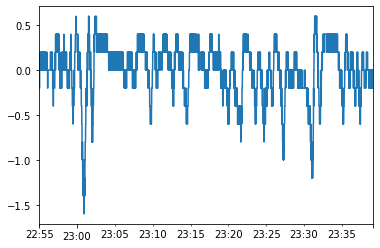

In [481]:
tt_2019_eg = tt_2019['elevation_gain']
tt_2019_eg.plot()

In [482]:
tt_2019_eg.describe()

count    2655.000000
mean        0.000377
std         0.298628
min        -1.600000
25%        -0.200000
50%         0.000000
75%         0.200000
max         0.600000
Name: elevation_gain, dtype: float64

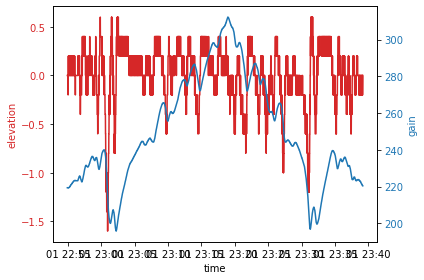

In [480]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('elevation', color=color)
ax1.plot(tt_2019_eg, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('gain', color=color)  # we already handled the x-label with ax1
ax2.plot(tt_2019_ev, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

From the graph above, we can see that there are some spikes in the elevation gain data but they are inline with what is going on with the elevation.n  Thus, there are no data-points of concern.

<AxesSubplot:>

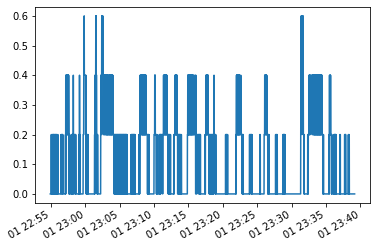

In [484]:
# Create IQR values
Q1_tt2019_eg = np.percentile(tt_2019_eg, 25, interpolation = 'midpoint')
Q3_tt2019_eg = np.percentile(tt_2019_eg, 75, interpolation = 'midpoint')
IQR_tt2019_eg = Q3_tt2019_eg - Q1_tt2019_eg

# dropp values
tt_2019_eg_drop_pos = tt_2019.drop(tt_2019.index[(tt_2019['elevation_gain'] < 0) | (tt_2019['elevation_gain'] > (Q3_tt2019_eg+1.5*IQR_tt2019_eg))])

# show descriptive stats with removed outliers
tt_2019_eg_dropped_pos = tt_2019_eg_drop_pos['elevation_gain']
tt_2019_eg_dropped_pos.describe()
tt_2019_eg_dropped_pos.plot()

In [485]:
tt_2019_teg_sum = sum(tt_2019_eg_dropped_pos)
print("Total Elevation Gain: " + str(tt_2019_teg_sum))

Total Elevation Gain: 288.8000000000004


> Heart Rate

count    2655.000000
mean      152.741243
std         8.217632
min        88.000000
25%       150.000000
50%       153.000000
75%       158.000000
max       166.000000
Name: hr, dtype: float64

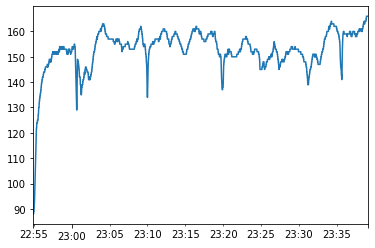

In [486]:
tt_2019_hr = tt_2019['hr']
tt_2019_hr.plot()
tt_2019_hr.describe()

From the Heart Rate (HR) data above, we can see some sudden changes of HR. Therefore, we will perform data cleaning to increase the accuracy of out results.

In [488]:
#converting dictionary to an array
result = tt_2019_hr.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_tt2019_hr = np.percentile(tt_2019_hr, 25, interpolation = 'midpoint')
Q3_tt2019_hr = np.percentile(tt_2019_hr, 75, interpolation = 'midpoint')
IQR_tt2019_hr = Q3_tt2019_hr - Q1_tt2019_hr

# drop values
tt_2019_hr_drop = tt_2019.drop(tt_2019.index[(tt_2019['hr'] < (Q1_tt2019_hr-1.5*IQR_tt2019_hr)) | (tt_2019['hr'] > (Q3_tt2019_hr+1.5*IQR_tt2019_hr))])

# show descriptive stats with removed outliers
tt_2019_hr_dropped = tt_2019_hr_drop['hr']
tt_2019_hr_dropped.describe()

count    2573.000000
mean      153.723669
std         5.501609
min       138.000000
25%       151.000000
50%       154.000000
75%       158.000000
max       166.000000
Name: hr, dtype: float64

<AxesSubplot:>

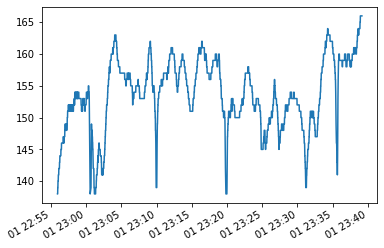

In [489]:
tt_2019_hr_dropped.plot()

In [490]:
print("Summation of Heart Rate data using cleaned data-set:")
print("    Average (Mean): " + str(tt_2019_hr_dropped.mean()) + " BMP")
print("    Max: " + str(max(tt_2019_hr_dropped)) + " BMP")
print("    Min: " + str(min(tt_2019_hr_dropped)) + " BMP")

Summation of Heart Rate data using cleaned data-set:
    Average (Mean): 153.7236688690245 BMP
    Max: 166.0 BMP
    Min: 138.0 BMP


> Temperature

count    2655.000000
mean       10.194350
std         0.833934
min         9.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        13.000000
Name: temperature, dtype: float64

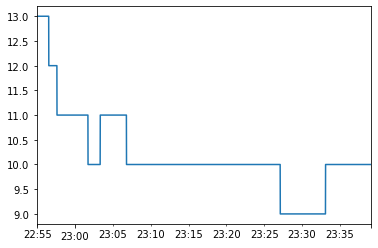

In [491]:
tt_2019_temp = tt_2019['temperature']
tt_2019_temp.plot()
tt_2019_temp.describe()

In [492]:
print("From the graphically representated temperature data above, there are no sigificant jumps in data signiling outliers. Therefore, we can calucluate:")
print("    Average (Mean): " + str(tt_2019_temp.mean()) + " Degrees")
print("    Max: " + str(max(tt_2019_temp)) + " Degrees")
print("    Min: " + str(min(tt_2019_temp)) + " Degrees")

From the graphically representated temperature data above, there are no sigificant jumps in data signiling outliers. Therefore, we can calucluate:
    Average (Mean): 10.194350282485876 Degrees
    Max: 13.0 Degrees
    Min: 9.0 Degrees


**Sumary**

In [495]:
print("Below is a summation of the findings above for the time trial data dated 2019:")
print("Distance:")
print("    Total: " + str(sum(tt_2019_dist_dropped)) + (" KM"))
print("Speed:")
print("    Average: " +  str(tt_2019_speed.mean()) + " KMPH")
print("    Max: " + str(max(tt_2019_speed)) + (" KMPH"))
print("    Min: " + str(min(tt_2019_speed)) + (" KMPH"))
print("    Standard Devidation: " + str(np.std(tt_2019_speed)))
print("Elevation:")
print("    Max: " + str(max(tt_2019_ev)))
print("    Min: " + str(min(tt_2019_ev)))
print("    Elevation Gain: " + str(tt_2019_teg_sum))
print("    Average Elevation: " + str(tt_2019_ev.mean()))
print("Heart Rate")
print("    Average (Mean): " + str(tt_2019_hr_dropped.mean()) + " BMP")
print("    Max: " + str(max(tt_2019_hr_dropped)) + " BMP")
print("    Min: " + str(min(tt_2019_hr_dropped)) + " BMP")
print("Temperature")
print("    Average (Mean): " + str(tt_2019_temp.mean()) + " Degrees")
print("    Max: " + str(max(tt_2019_temp)) + " Degrees")
print("    Min: " + str(min(tt_2019_temp)) + " Degrees")

Below is a summation of the findings above for the time trial data dated 2019:
Distance:
    Total: 23.48678381039439 KM
Speed:
    Average: 33.05782378815691 KMPH
    Max: 63.300734121945005 KMPH
    Min: 0.0 KMPH
    Standard Devidation: 9.771680920602345
Elevation:
    Max: 312.2
    Min: 195.8
    Elevation Gain: 288.8000000000004
    Average Elevation: 250.435103578155
Heart Rate
    Average (Mean): 153.7236688690245 BMP
    Max: 166.0 BMP
    Min: 138.0 BMP
Temperature
    Average (Mean): 10.194350282485876 Degrees
    Max: 13.0 Degrees
    Min: 9.0 Degrees


> ## Question #2
Compare the range of speeds for each ride, are time trials faster than road races?

### Data

In [507]:
# RR
print("Speed RR 2016:")
print("    Average: " +  str(rr_2016_speed_dropped.mean()) + " KMPH")
print("    Max: " + str(max(rr_2016_speed_dropped)) + (" KMPH"))
print("    Min: " + str(min(rr_2016_speed_dropped)) + (" KMPH"))

print("Speed RR 2019:")
print("    Average: " +  str(rr_2019_speed_dropped.mean()) + " KMPH")
print("    Max: " + str(max(rr_2019_speed_dropped)) + (" KMPH"))
print("    Min: " + str(min(rr_2019_speed_dropped)) + (" KMPH"))
print("    Standard Devidation: " + str(np.std(rr_2019_speed_dropped)))
# TT races
print("Speed TT 2016:")
print("    Average: " +  str(tt_2016_speed_dropped.mean()) + " KMPH")
print("    Max: " + str(max(tt_2016_speed_dropped)) + (" KMPH"))
print("    Min: " + str(min(tt_2016_speed_dropped)) + (" KMPH"))
print("    Standard Devidation: " + str(np.std(tt_2016_speed_dropped)))

print("Speed TT 2019:")
print("    Average: " +  str(tt_2019_speed.mean()) + " KMPH")
print("    Max: " + str(max(tt_2019_speed)) + (" KMPH"))
print("    Min: " + str(min(tt_2019_speed)) + (" KMPH"))
print("    Standard Devidation: " + str(np.std(tt_2019_speed)))
# analysis
print("From the data above, we will plot it to gain a visual understanding of the ranges and differences between the rides.")

Speed RR 2016:
    Average: 34.89352929484383 KMPH
    Max: 66.93246613791685 KMPH
    Min: 8.62340892533519 KMPH
Speed RR 2019:
    Average: 33.400446814183866 KMPH
    Max: 54.26847256870253 KMPH
    Min: 13.138501394084688 KMPH
    Standard Devidation: 7.5646346154411335
Speed TT 2016:
    Average: 33.46706828901973 KMPH
    Max: 65.84062431415376 KMPH
    Min: 0.9912815096822482 KMPH
    Standard Devidation: 10.890624114253193
Speed TT 2019:
    Average: 33.05782378815691 KMPH
    Max: 63.300734121945005 KMPH
    Min: 0.0 KMPH
    Standard Devidation: 9.771680920602345
From the data above, we will plot it to gain a visual understanding of the ranges and differences between the rides.


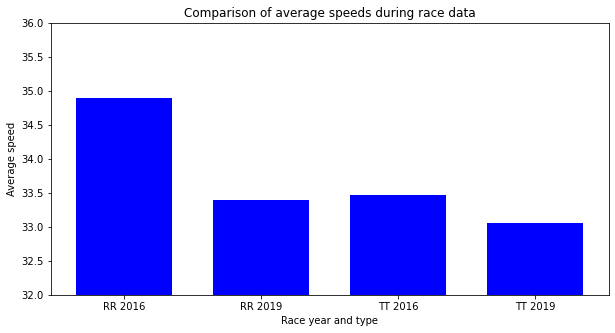

In [520]:
rr_2016_speed_ave = rr_2016_speed_dropped.mean()
rr_2019_speed_ave = rr_2019_speed_dropped.mean()
tt_2016_speed_ave = tt_2016_speed_dropped.mean()
tt_2019_speed_ave = tt_2019_speed.mean()


# creating the dataset
data = {'RR 2016':rr_2016_speed_ave, 'RR 2019':rr_2019_speed_ave , 'TT 2016':tt_2016_speed_ave,
        'TT 2019':tt_2019_speed_ave}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.7)
plt.ylim(32, 36)
 
plt.xlabel("Race year and type")
plt.ylabel("Average speed")
plt.title("Comparison of average speeds during race data")
plt.show()

### Analysis

In [641]:
print("From the data respresented above we can determine a few things:")
print("1. Races in 2016 were rode faster compaired with races rode in 2019")
print("    - 2016 Race average: " + str((rr_2016_speed_ave + tt_2016_speed_ave)/2) + " KMPH")
print("    - 2019 Race average: " + str((rr_2019_speed_ave + tt_2019_speed_ave)/2) + " KMPH")
print("    - Races in 2016 were " + str(((rr_2016_speed_ave + tt_2016_speed_ave)/2)-((rr_2019_speed_ave + tt_2019_speed_ave)/2)) + " KMPH faster than 2019 races.")
print("2. Road Races had a higher average speed compaired to Time Trials:")
print("    - 2016 data")
print("        - RR Ave: " + str(rr_2016_speed_ave) + " KMPH.")
print("        - TT Ave: " + str(tt_2016_speed_ave) + " KMPH.")
print("            - Difference: " + str(rr_2016_speed_ave-tt_2016_speed_ave) + " KMPH.")
print("    - 2019 data")
print("        - RR Ave: " + str(rr_2019_speed_ave) + " KMPH.")
print("        - TT Ave: " + str(tt_2019_speed_ave) + " KMPH.")
print("            - Difference: " + str(rr_2019_speed_ave-tt_2019_speed_ave) + " KMPH.")
print("    - RR vs TT data")
print("        - RR Ave: " + str((rr_2019_speed_ave + rr_2016_speed_ave)/2) + " KMPH.")
print("        - TT Ave: " + str((tt_2019_speed_ave + tt_2016_speed_ave)/2) + " KMPH.")
print("        - Road Races are " + str(((rr_2019_speed_ave + rr_2016_speed_ave)/2)-((tt_2019_speed_ave + tt_2016_speed_ave)/2)) + " KMPH faser than Time Tials.")

From the data respresented above we can determine a few things:
1. Races in 2016 were rode faster compaired with races rode in 2019
    - 2016 Race average: 34.180298791931776 KMPH
    - 2019 Race average: 33.22913530117039 KMPH
    - Races in 2016 were 0.9511634907613882 KMPH faster than 2019 races.
2. Road Races had a higher average speed compaired to Time Trials:
    - 2016 data
        - RR Ave: 34.89352929484383 KMPH.
        - TT Ave: 33.46706828901973 KMPH.
            - Difference: 1.4264610058241018 KMPH.
    - 2019 data
        - RR Ave: 33.400446814183866 KMPH.
        - TT Ave: 33.05782378815691 KMPH.
            - Difference: 0.34262302602695627 KMPH.
    - RR vs TT data
        - RR Ave: 34.14698805451385 KMPH.
        - TT Ave: 33.26244603858832 KMPH.
        - Road Races are 0.8845420159255255 KMPH faser than Time Tials.


The deline in race average speeds from 2016 to 2019 could have been a result of a number of factors. These could have included: ageing equipment, reduced fitness level, roughenging of road surface over time, temperature of air, road and humditiy (effecting grip and drag) and ageing of althlete, to name a few.

Time Trials often have lower average speeds when compaired to Road Races. This is due to the fact that Time Trials are almost entirely based on the fitness and skill of the individual rider as they are raced in a sequential one-by-one basis. This means that drafting (reducing drag by being in ones 'slip streem')is not common place, which on the other hand is common place in Road Races where all competitors start together. Even though Time Tials are often shorter in length, they can be 'harder' than Road Races due to lack of drafting and motivation of riders around them.

> ### Question #4
Compare the speeds achieved in the two time trials (three years apart). As well as looking at the averages, can you see where in the ride one or the other is faster.

### Data

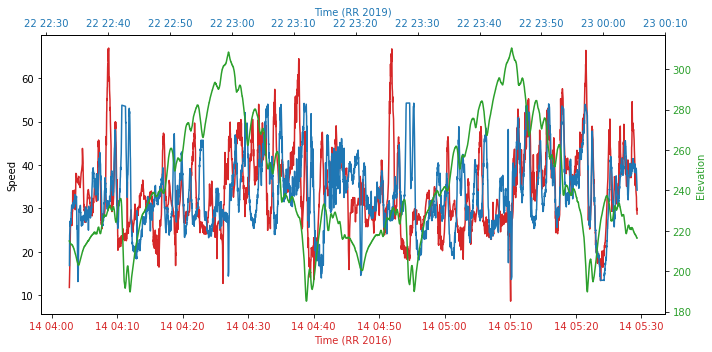

In [554]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (RR 2016)', color=color)
ax1.set_ylabel('Speed')
ax1.plot(rr_2016_speed_dropped, color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same y-axis

color = 'tab:blue'
ax2.set_xlabel('Time (RR 2019)', color=color)  # we already handled the y-label with ax1
ax2.plot(rr_2019_speed_dropped, color=color)
ax2.tick_params(axis='x', labelcolor=color)

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax3.set_ylabel('Elevation', color=color)  # we already handled the x-label with ax1
ax3.plot(rr_2019_ev, color=color)
ax3.tick_params(axis='y', labelcolor=color)


fig.set_size_inches(10, 5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [557]:
# TT races
print("Speed TT 2016:")
print("    Average: " +  str(tt_2016_speed_dropped.mean()) + " KMPH")
print("    Max: " + str(max(tt_2016_speed_dropped)) + (" KMPH"))
print("    Min: " + str(min(tt_2016_speed_dropped)) + (" KMPH"))
print("    Standard Deviation: " + str(np.std(tt_2016_speed_dropped)))

print("Speed TT 2019:")
print("    Average: " +  str(tt_2019_speed.mean()) + " KMPH")
print("    Max: " + str(max(tt_2019_speed)) + (" KMPH"))
print("    Min: " + str(min(tt_2019_speed)) + (" KMPH"))
print("    Standard Deviation: " + str(np.std(tt_2019_speed)))

Speed TT 2016:
    Average: 33.46706828901973 KMPH
    Max: 65.84062431415376 KMPH
    Min: 0.9912815096822482 KMPH
    Standard Deviation: 10.890624114253193
Speed TT 2019:
    Average: 33.05782378815691 KMPH
    Max: 63.300734121945005 KMPH
    Min: 0.0 KMPH
    Standard Deviation: 9.771680920602345


### Analysis

In [781]:
print("   From the graphical representation of the two speed data sets from 2016 and 2019 and the elvation of the course (taken from the 2019 race), we can see a few interesting things.")
print("")
print("   Firstly, from the data we can see that the Time Trial race in 2016 was ridden " + str(tt_2016_speed_ave - tt_2019_speed_ave) + " KMPH faster than the Time Trial race in 2019.")
print("")
print("   Secondly, from the overlay data between the two Time Trial races and the Elevation, we can see that the race from 2016 had consistently higher top speeds, generally found on the downhill secions of the course when compaired to the 2019 race. This finding was supported with the race in 2016 having a higher standard deviation than the 2019 race by " + str(np.std(tt_2016_speed_dropped)-np.std(tt_2019_speed)) + ". This could have been caused by a number of factors, but most notably: newer equipment in 2016 that aged by 2019 and/or 'pushing' it more on the downhill sections. The uphill sections seemed to have no notable differences.")

   From the graphical representation of the two speed data sets from 2016 and 2019 and the elvation of the course (taken from the 2019 race), we can see a few interesting things.

   Firstly, from the data we can see that the Time Trial race in 2016 was ridden 0.40924450086281894 KMPH faster than the Time Trial race in 2019.

   Secondly, from the overlay data between the two Time Trial races and the Elevation, we can see that the race from 2016 had consistently higher top speeds, generally found on the downhill secions of the course when compaired to the 2019 race. This finding was supported with the race in 2016 having a higher standard deviation than the 2019 race by 1.118943193650848. This could have been caused by a number of factors, but most notably: newer equipment in 2016 that aged by 2019 and/or 'pushing' it more on the downhill sections. The uphill sections seemed to have no notable differences.


**To Note**: The elevation was taken from the 2019 TT race, this provided a rough elevation status to compair for each of the races, but was not 100% accurate and synced for the 2016 speed data. The 2019 race did performed differenly during differnt sections of the course hence the reduced accuracy. However, this was intended as a rough visual aid only and not entirely 100% accurate. The reason behind not putting both elevation data as a overlay was to keep the graph as cleen as possible, as it was already quite crowded with 3 diffent data sets already and the benefit for the additionial elevation graph would have been minimal.

> ### Question #5
From the elevation_gain field you can see whether the rider is climbing , descending or on the flat. Use this to calculate the average speeds in those three cases (climbing, flat or descending). Note that flat might not be zero elevation_gain but might allow for slight climbs and falls.

count    2655.000000
mean        0.000377
std         0.298628
min        -1.600000
25%        -0.200000
50%         0.000000
75%         0.200000
max         0.600000
Name: elevation_gain, dtype: float64

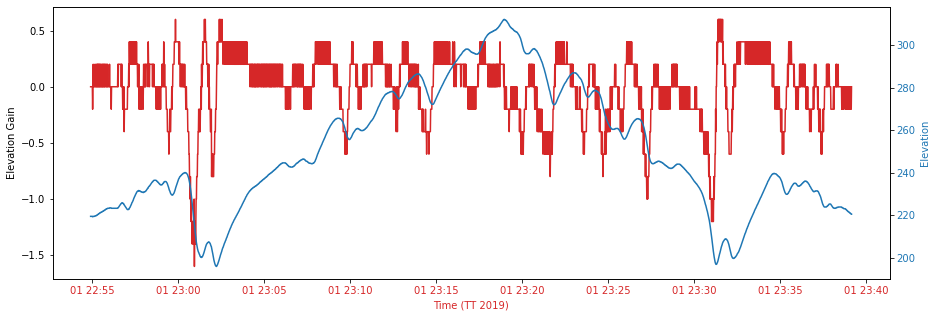

In [666]:
#plot to get a gist/overview of what is happening
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (TT 2019)', color=color)
ax1.set_ylabel('Elevation Gain')
ax1.plot(tt_2019_eg, color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same y-axis

color = 'tab:blue'
ax2.set_ylabel('Elevation', color=color)  # we already handled the y-label with ax1
ax2.plot(tt_2019_ev, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.set_size_inches(15, 5)

tt_2019_eg.describe()

In order to find what is considered to be a flat, uphill and downhill, based on elevation gain, we will need to do some calculations.

According to http://theclimbingcyclist.com/gradients-and-cycling-an-introduction/, 0% gradient is considered a flat, 1-3% is like riding into a head wind and 4% and above is a hill, which will cause fatigue over time. From this information we will consider a gradient of -3% to 3% a flat, below -3% downhill and above 3% uphill.

### Road Race 2016

In [667]:
print("Taken the average speed of the 2016 Road Race race was " +  str(rr_2016_speed_dropped.mean()) + " KMPH, and a 3% climb is 1.35 degrees. We have taken assumption that each gps data-point is created every second, from this we can find the following:")

Taken the average speed of the 2016 Road Race race was 34.89352929484383 KMPH, and a 3% climb is 1.35 degrees. We have taken assumption that each gps data-point is created every second, from this we can find the following:


In [626]:
# Re-define values for simplicity
ave_sped_rr2016 = rr_2016_speed_dropped.mean()
# take average speed of the ride in kmph and convert to kmps (per second)
kmps_rr2016 = (ave_sped_rr2016/60)/60
# take kmps value and put into a = c × sin(α) equation
eg_value_rr2016 = (kmps_rr2016 * (math.sin(math.radians(1.35))))
print("Value of elevation gain of 3% gradient: " + str(eg_value_rr2016) + " at an average speed of: " + str(ave_sped_rr2016) + " KMPH.")

Value of elevation gain of 3% gradient: 0.00022835648455589092 at an average speed of: 34.89352929484383 KMPH.


#### Flat

count    755.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: elevation_gain, dtype: float64

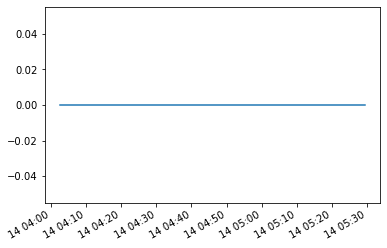

In [621]:
# calculate negative elevation gain value of 3% gradient
eg_value_rr2016_neg = (-1) * (eg_value_rr2016)
# drop values surrounding elevation gain value
flat_rr2016 = rr_2016.drop( rr_2016.index[(rr_2016['elevation_gain'] <= eg_value_rr2016_neg) | (rr_2016['elevation_gain'] >= eg_value_rr2016)])
flat_rr2016['elevation_gain'].plot()
flat_rr2016['elevation_gain'].describe()

From the calculations, only datapoints with a zero elevation gain were kept. This was by co-incident, but with this we can caluclate the following:

<AxesSubplot:>

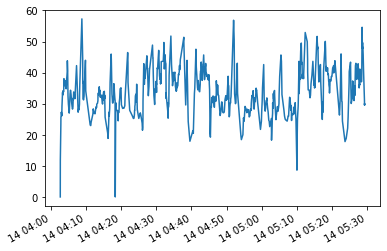

In [628]:
flat_rr2016_speed = flat_rr2016['speed']
flat_rr2016_speed.plot()

From this graph, we can see there are a few outliers. We will now remove them.

<AxesSubplot:>

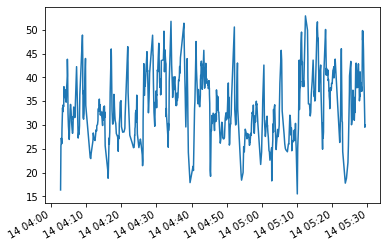

In [633]:
#converting dictionary to an array
result = flat_rr2016_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_flat_rr2016_speed = np.percentile(flat_rr2016_speed, 25, interpolation = 'midpoint')
Q3_flat_rr2016_speed = np.percentile(flat_rr2016_speed, 75, interpolation = 'midpoint')
IQR_flat_rr2016_speed = Q3_flat_rr2016_speed - Q1_flat_rr2016_speed

# drop values
flat_rr2016_speed_drop = flat_rr2016.drop(flat_rr2016_speed.index[(flat_rr2016['speed'] < (Q1_flat_rr2016_speed-1.5*IQR_flat_rr2016_speed)) | (flat_rr2016['speed'] > (Q3_flat_rr2016_speed+1.5*IQR_flat_rr2016_speed))])

# show descriptive stats with removed outliers
flat_rr2016_speed_dropped = flat_rr2016_speed_drop['speed']
flat_rr2016_speed_dropped.describe()
flat_rr2016_speed_dropped.plot()

In [636]:
print("From the cleaned data, the following has been calculated:")
print("    Average Speed: " + str(flat_rr2016_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(flat_rr2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(flat_rr2016_speed_dropped)) + " KMPH.")

From the cleaned data, the following has been calculated:
    Average Speed: 34.448524637164795 KMPH.
    Max Speed: 52.90753097862545 KMPH.
    Min Speed: 15.538749630199455 KMPH.


#### Hills

count    1142.000000
mean        0.450963
std         0.097802
min         0.400000
25%         0.400000
50%         0.400000
75%         0.400000
max         1.200000
Name: elevation_gain, dtype: float64

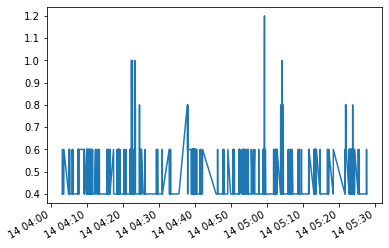

In [639]:
# calculate negative elevation gain value of 3% gradient
eg_value_rr2016_neg = (-1) * (eg_value_rr2016)
# drop values surrounding elevation gain value
hills_rr2016 = rr_2016.drop( rr_2016.index[(rr_2016['elevation_gain'] <= eg_value_rr2016)])
hills_rr2016['elevation_gain'].plot()
hills_rr2016['elevation_gain'].describe()

<AxesSubplot:>

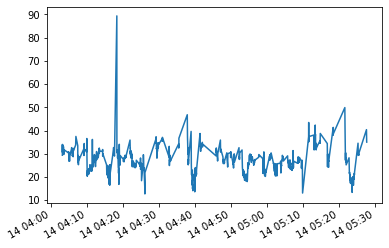

In [644]:
hills_rr2016_speed = hills_rr2016['speed']
hills_rr2016_speed.plot()

From the graph above, we can see there is one clear outlier in the data.

<AxesSubplot:>

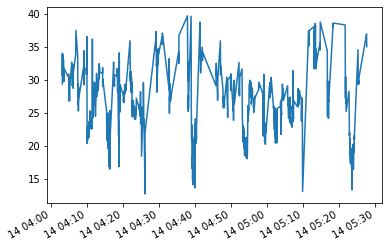

In [653]:
#converting dictionary to an array
result = hills_rr2016_speed.items()
data = list(result)
numpyArray = np.array(data)

# drop values - the 60 was a safe estimate
hills_rr2016_dropped = rr_2016.drop( rr_2016.index[(rr_2016['speed'] <= 60)])

# show descriptive stats with removed outliers
hills_rr2016_speed_dropped = hills_rr2016_speed_drop['speed']
hills_rr2016_speed_dropped.plot()

In [654]:
hills_rr2016_speed_dropped.describe()

count    1128.000000
mean       26.138790
std         4.937297
min        12.711393
25%        22.530632
50%        26.048593
75%        29.316787
max        39.688225
Name: speed, dtype: float64

From the cleaned data, the following has been calculated:

In [655]:
print("    Average Speed: " + str(hills_rr2016_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(hills_rr2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(hills_rr2016_speed_dropped)) + " KMPH.")

    Average Speed: 26.13878972018131 KMPH.
    Max Speed: 39.688225359814105 KMPH.
    Min Speed: 12.711392779957256 KMPH.


#### Down-hills

count    925.000000
mean      -0.568216
std        0.237742
min       -1.600000
25%       -0.600000
50%       -0.400000
75%       -0.400000
max       -0.400000
Name: elevation_gain, dtype: float64

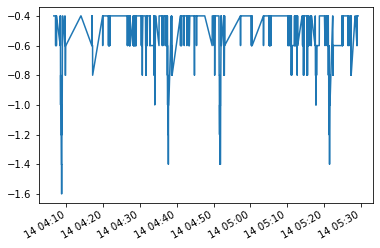

In [657]:
# calculate negative elevation gain value of 3% gradient
eg_value_rr2016_neg = (-1) * (eg_value_rr2016)
# drop values surrounding elevation gain value
dhill_rr2016 = rr_2016.drop( rr_2016.index[(rr_2016['elevation_gain'] >= eg_value_rr2016_neg)])
dhill_rr2016['elevation_gain'].plot()
dhill_rr2016['elevation_gain'].describe()

<AxesSubplot:>

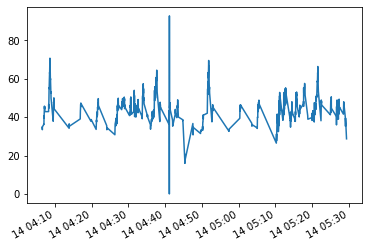

In [659]:
dhill_rr2016_speed = dhill_rr2016['speed']
dhill_rr2016_speed.plot()

From the graph above, we can see there are obious outliers.

<AxesSubplot:>

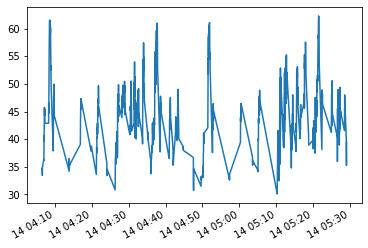

In [663]:
#converting dictionary to an array
result = dhill_rr2016_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_dhill_rr2016_speed = np.percentile(dhill_rr2016_speed, 25, interpolation = 'midpoint')
Q3_dhill_rr2016_speed = np.percentile(dhill_rr2016_speed, 75, interpolation = 'midpoint')
IQR_dhill_rr2016_speed = Q3_dhill_rr2016_speed - Q1_dhill_rr2016_speed

# drop values
dhill_rr2016_speed_drop = dhill_rr2016.drop(dhill_rr2016_speed.index[(dhill_rr2016['speed'] < (Q1_dhill_rr2016_speed-1.5*IQR_dhill_rr2016_speed)) | (dhill_rr2016['speed'] > (Q3_dhill_rr2016_speed+1.5*IQR_dhill_rr2016_speed))])

# show descriptive stats with removed outliers
dhill_rr2016_speed_dropped = dhill_rr2016_speed_drop['speed']
dhill_rr2016_speed_dropped.plot()

From the cleaned data, the following has been calculated:

In [664]:
print("    Average Speed: " + str(dhill_rr2016_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(dhill_rr2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(dhill_rr2016_speed_dropped)) + " KMPH.")

    Average Speed: 45.48861835603259 KMPH.
    Max Speed: 62.306415026536556 KMPH.
    Min Speed: 30.089641803251865 KMPH.


### Summary of Road Race 2016

In [665]:
print("On the Flats:")
print("    Average Speed: " + str(flat_rr2016_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(flat_rr2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(flat_rr2016_speed_dropped)) + " KMPH.")
print("On the Hills:")
print("    Average Speed: " + str(hills_rr2016_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(hills_rr2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(hills_rr2016_speed_dropped)) + " KMPH.")
print("    Average Speed: " + str(dhill_rr2016_speed_dropped.mean()) + " KMPH.")
print("On the Down Hills:")
print("    Max Speed: " + str(max(dhill_rr2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(dhill_rr2016_speed_dropped)) + " KMPH.")

On the Flats:
    Average Speed: 34.448524637164795 KMPH.
    Max Speed: 52.90753097862545 KMPH.
    Min Speed: 15.538749630199455 KMPH.
On the Hills:
    Average Speed: 26.13878972018131 KMPH.
    Max Speed: 39.688225359814105 KMPH.
    Min Speed: 12.711392779957256 KMPH.
    Average Speed: 45.48861835603259 KMPH.
On the Down Hills:
    Max Speed: 62.306415026536556 KMPH.
    Min Speed: 30.089641803251865 KMPH.


## Time Trial 2016

In [669]:
print("Taken the average speed of the 2016 TT race was " +  str(tt_2016_speed_dropped.mean()) + " KMPH, and a 3% climb is 1.35 degrees. We have taken assumption that each gps data-point is created every second, from this we can find the following:")

Taken the average speed of the 2016 TT race was 33.46706828901973 KMPH, and a 3% climb is 1.35 degrees. We have taken assumption that each gps data-point is created every second, from this we can find the following:


In [670]:
# Re-define values for simplicity
ave_sped_tt2016 = tt_2016_speed_dropped.mean()
# take average speed of the ride in kmph and convert to kmps (per second)
kmps_tt2016 = (ave_sped_tt2016/60)/60
# take kmps value and put into a = c × sin(α) equation
eg_value_tt2016 = (kmps_tt2016 * (math.sin(math.radians(1.35))))
print("Value of elevation gain of 3% gradient: " + str(eg_value_tt2016) + " at an average speed of: " + str(ave_sped_tt2016) + " KMPH.")

Value of elevation gain of 3% gradient: 0.0002190211829332435 at an average speed of: 33.46706828901973 KMPH.


#### Flats

+/- value for flat conditions: 0.0002190211829332435


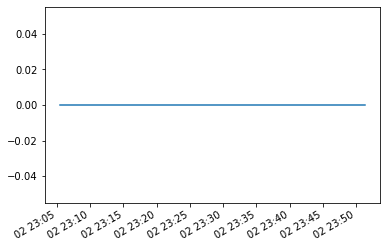

In [673]:
# calculate negative elevation gain value of 3% gradient
eg_value_tt2016_neg = (-1) * (eg_value_tt2016)
# drop values surrounding elevation gain value
flat_tt2016 = tt_2016.drop( tt_2016.index[(tt_2016['elevation_gain'] <= eg_value_tt2016_neg) | (tt_2016['elevation_gain'] >= eg_value_tt2016)])
flat_tt2016['elevation_gain'].plot()
flat_tt2016['elevation_gain'].describe()
print("+/- value for flat conditions: " + str(eg_value_tt2016))

count    452.000000
mean      34.249664
std        9.905648
min        0.000000
25%       30.296582
50%       33.933852
75%       38.464649
max      162.505764
Name: speed, dtype: float64

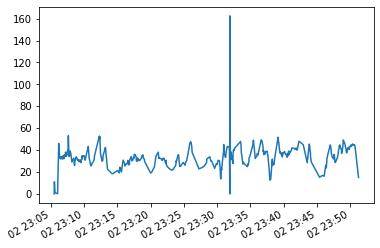

In [678]:
flat_tt2016_speed = flat_tt2016['speed']
flat_tt2016_speed.plot()
flat_tt2016_speed.describe()

We can clearly see that there are some data points that are anomolies.

count    433.000000
mean      34.580146
std        6.342096
min       18.460497
25%       30.583055
50%       34.208750
75%       38.452245
max       50.081369
Name: speed, dtype: float64

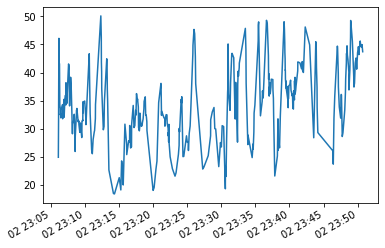

In [679]:
#converting dictionary to an array
result = flat_tt2016_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_flat_tt2016_speed = np.percentile(flat_tt2016_speed, 25, interpolation = 'midpoint')
Q3_flat_tt2016_speed = np.percentile(flat_tt2016_speed, 75, interpolation = 'midpoint')
IQR_flat_tt2016_speed = Q3_flat_tt2016_speed - Q1_flat_tt2016_speed

# drop values
flat_tt2016_speed_drop = flat_tt2016.drop(flat_tt2016_speed.index[(flat_tt2016['speed'] < (Q1_flat_tt2016_speed-1.5*IQR_flat_tt2016_speed)) | (flat_tt2016['speed'] > (Q3_flat_tt2016_speed+1.5*IQR_flat_tt2016_speed))])

# show descriptive stats with removed outliers
flat_tt2016_speed_dropped = flat_tt2016_speed_drop['speed']
flat_tt2016_speed_dropped.plot()
flat_tt2016_speed_dropped.describe()

In [680]:
print("From the cleaned data, the following has been calculated:")
print("    Average Speed: " + str(flat_tt2016_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(flat_tt2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(flat_tt2016_speed_dropped)) + " KMPH.")

From the cleaned data, the following has been calculated:
    Average Speed: 34.58014586006729 KMPH.
    Max Speed: 50.08136855806054 KMPH.
    Min Speed: 18.460497432342034 KMPH.


### Up-hills

count    625.000000
mean       0.461760
std        0.137608
min        0.200000
25%        0.400000
50%        0.400000
75%        0.600000
max        2.400000
Name: elevation_gain, dtype: float64

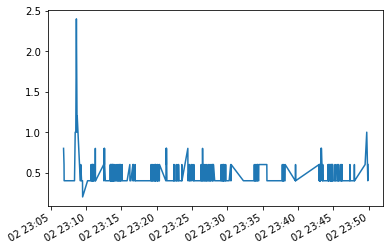

In [693]:
# calculate negative elevation gain value of 3% gradient
eg_value_tt2016_neg = (-1) * (eg_value_tt2016)
# drop values surrounding elevation gain value
hill_tt2016 = tt_2016.drop( tt_2016.index[(tt_2016['elevation_gain'] <= eg_value_tt2016)])
hill_tt2016['elevation_gain'].plot()
hill_tt2016['elevation_gain'].describe()

count    625.000000
mean      24.582852
std        6.131534
min        9.768391
25%       20.040192
50%       24.131799
75%       28.670928
max       44.092617
Name: speed, dtype: float64

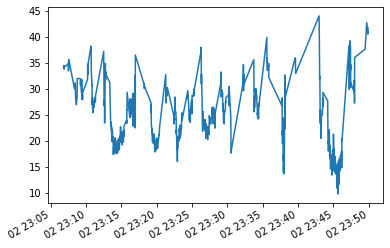

In [699]:
hill_tt2016_speed = hill_tt2016['speed']
hill_tt2016_speed.plot()
hill_tt2016_speed.describe()

From the graphical representation above, there are no datasets of concern. All data points are supported with the overall trend around it. Thus, we can determine that:

In [707]:
print("    Average Speed: " + str(hill_tt2016_speed.mean()) + " KMPH.")
print("    Max Speed: " + str(max(hill_tt2016_speed)) + " KMPH.")
print("    Min Speed: " + str(min(hill_tt2016_speed)) + " KMPH.")

    Average Speed: 24.582851769382092 KMPH.
    Max Speed: 44.092617380522015 KMPH.
    Min Speed: 9.768391461204546 KMPH.


### Down-hills

count    464.000000
mean      -0.630172
std        0.414785
min       -7.400000
25%       -0.800000
50%       -0.600000
75%       -0.400000
max       -0.200000
Name: elevation_gain, dtype: float64

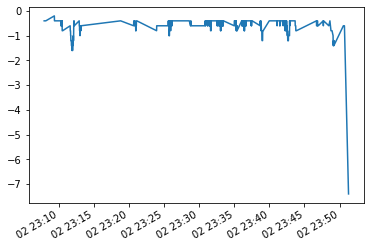

In [726]:
# calculate negative elevation gain value of 3% gradient
eg_value_tt2016_neg = (-1) * (eg_value_tt2016)
# drop values surrounding elevation gain value
dhill_tt2016 = tt_2016.drop( tt_2016.index[(tt_2016['elevation_gain'] >= eg_value_tt2016_neg)])
dhill_tt2016['elevation_gain'].plot()
dhill_tt2016['elevation_gain'].describe()

count    464.000000
mean      44.880480
std        7.580391
min       26.076127
25%       39.863010
50%       44.339202
75%       49.856694
max       67.862011
Name: speed, dtype: float64

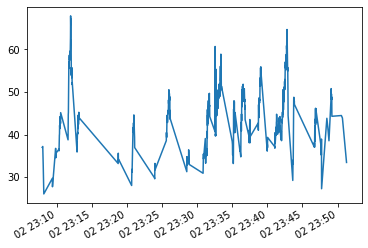

In [727]:
dhill_tt2016_speed = dhill_tt2016['speed']
dhill_tt2016_speed.plot()
dhill_tt2016_speed.describe()

From the graph above, we detect there may be some outliers.

count    461.000000
mean      44.736950
std        7.391846
min       26.076127
25%       39.857375
50%       44.234153
75%       49.687255
max       64.670085
Name: speed, dtype: float64

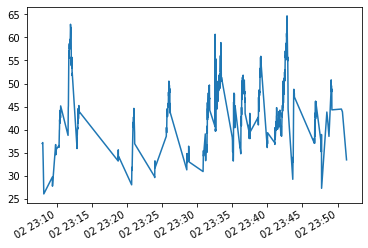

In [735]:
#converting dictionary to an array
result = dhill_tt2016_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_dhill_tt2016_speed = np.percentile(dhill_tt2016_speed, 25, interpolation = 'midpoint')
Q3_dhill_tt2016_speed = np.percentile(dhill_tt2016_speed, 75, interpolation = 'midpoint')
IQR_dhill_tt2016_speed = Q3_dhill_tt2016_speed - Q1_dhill_tt2016_speed

# drop values
dhill_tt2016_speed_drop = dhill_tt2016.drop(dhill_tt2016_speed.index[(dhill_tt2016['speed'] < (Q1_dhill_tt2016_speed-1.5*IQR_dhill_tt2016_speed)) | (dhill_tt2016['speed'] > (Q3_dhill_tt2016_speed+1.5*IQR_dhill_tt2016_speed))])

# show descriptive stats with removed outliers
dhill_tt2016_speed_dropped = dhill_tt2016_speed_drop['speed']
dhill_tt2016_speed_dropped.plot()
dhill_tt2016_speed_dropped.describe()

From the now clean data, we can determine that on the hills:

In [729]:
print("    Average Speed: " + str(dhill_tt2016_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(dhill_tt2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(dhill_tt2016_speed_dropped)) + " KMPH.")

    Average Speed: 44.73695040511291 KMPH.
    Max Speed: 64.67008549271821 KMPH.
    Min Speed: 26.076126618752035 KMPH.


### TT 2016 Summary

In [770]:
print("On the flats:")
print("    Average Speed: " + str(flat_tt2016_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(flat_tt2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(flat_tt2016_speed_dropped)) + " KMPH.")
print("On the hills:")
print("    Average Speed: " + str(hill_tt2016_speed.mean()) + " KMPH.")
print("    Max Speed: " + str(max(hill_tt2016_speed)) + " KMPH.")
print("    Min Speed: " + str(min(hill_tt2016_speed)) + " KMPH.")
print("On the down-hills:")
print("    Average Speed: " + str(dhill_tt2016_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(dhill_tt2016_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(dhill_tt2016_speed_dropped)) + " KMPH.")

On the flats:
    Average Speed: 34.58014586006729 KMPH.
    Max Speed: 50.08136855806054 KMPH.
    Min Speed: 18.460497432342034 KMPH.
On the hills:
    Average Speed: 24.582851769382092 KMPH.
    Max Speed: 44.092617380522015 KMPH.
    Min Speed: 9.768391461204546 KMPH.
On the down-hills:
    Average Speed: 44.73695040511291 KMPH.
    Max Speed: 64.67008549271821 KMPH.
    Min Speed: 26.076126618752035 KMPH.


## Road Race 2019

In [747]:
print("Taken the average speed of the 2019 RR race was " +  str(rr_2019_speed_dropped.mean()) + " KMPH, and a 3% climb is 1.35 degrees. We have taken assumption that each gps data-point is created every second, from this we can find the following:")

Taken the average speed of the 2019 RR race was 33.400446814183866 KMPH, and a 3% climb is 1.35 degrees. We have taken assumption that each gps data-point is created every second, from this we can find the following:


In [710]:
# Re-define values for simplicity
ave_sped_rr2019 = rr_2019_speed_dropped.mean()
# take average speed of the ride in kmph and convert to kmps (per second)
kmps_rr2019 = (ave_sped_rr2019/60)/60
# take kmps value and put into a = c × sin(α) equation
eg_value_rr2019 = (kmps_rr2019 * (math.sin(math.radians(1.35))))
print("Value of elevation gain of 3% gradient: " + str(eg_value_rr2019) + " at an average speed of: " + str(ave_sped_rr2019) + " KMPH.")

Value of elevation gain of 3% gradient: 0.00021858518674435423 at an average speed of: 33.400446814183866 KMPH.


#### Flats

+/- value for flat conditions: 0.00021858518674435423


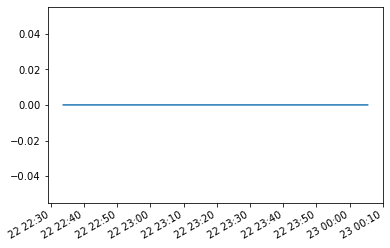

In [712]:
# calculate negative elevation gain value of 3% gradient
eg_value_rr2019_neg = (-1) * (eg_value_rr2019)
# drop values surrounding elevation gain value
flat_rr2019 = rr_2019.drop( rr_2019.index[(rr_2019['elevation_gain'] <= eg_value_rr2019_neg) | (rr_2019['elevation_gain'] >= eg_value_rr2019)])
flat_rr2019['elevation_gain'].plot()
flat_rr2019['elevation_gain'].describe()
print("+/- value for flat conditions: " + str(eg_value_rr2019))

count    1419.000000
mean       33.458463
std         5.780120
min         0.000000
25%        29.533182
50%        33.163444
75%        37.057721
max        64.700498
Name: speed, dtype: float64

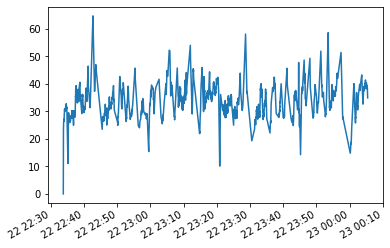

In [713]:
flat_rr2019_speed = flat_rr2019['speed']
flat_rr2019_speed.plot()
flat_rr2019_speed.describe()

From the data plot above, we can determine there may be some outliers.

count    1383.000000
mean       33.363066
std         4.830951
min        18.732862
25%        29.601399
50%        33.156908
75%        36.865674
max        47.777804
Name: speed, dtype: float64

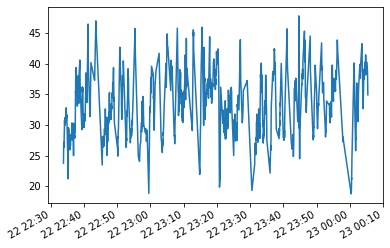

In [714]:
#converting dictionary to an array
result = flat_rr2019_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_flat_rr2019_speed = np.percentile(flat_rr2019_speed, 25, interpolation = 'midpoint')
Q3_flat_rr2019_speed = np.percentile(flat_rr2019_speed, 75, interpolation = 'midpoint')
IQR_flat_rr2019_speed = Q3_flat_rr2019_speed - Q1_flat_rr2019_speed

# drop values
flat_rr2019_speed_drop = flat_rr2019.drop(flat_rr2019_speed.index[(flat_rr2019['speed'] < (Q1_flat_rr2019_speed-1.5*IQR_flat_rr2019_speed)) | (flat_rr2019['speed'] > (Q3_flat_rr2019_speed+1.5*IQR_flat_rr2019_speed))])

# show descriptive stats with removed outliers
flat_rr2019_speed_dropped = flat_rr2019_speed_drop['speed']
flat_rr2019_speed_dropped.plot()
flat_rr2019_speed_dropped.describe()

In [715]:
print("From the cleaned data, the following has been calculated:")
print("    Average Speed: " + str(flat_rr2019_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(flat_rr2019_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(flat_rr2019_speed_dropped)) + " KMPH.")

From the cleaned data, the following has been calculated:
    Average Speed: 33.36306594284277 KMPH.
    Max Speed: 47.77780372135276 KMPH.
    Min Speed: 18.732862347401518 KMPH.


#### Hills

count    2361.000000
mean        0.291063
std         0.130159
min         0.200000
25%         0.200000
50%         0.200000
75%         0.400000
max         1.000000
Name: elevation_gain, dtype: float64

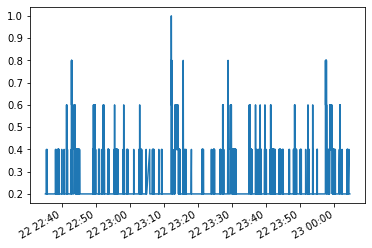

In [716]:
# calculate negative elevation gain value of 3% gradient
eg_value_rr2019_neg = (-1) * (eg_value_rr2019)
# drop values surrounding elevation gain value
hill_rr2019 = rr_2019.drop( rr_2019.index[(rr_2019['elevation_gain'] <= eg_value_rr2019)])
hill_rr2019['elevation_gain'].plot()
hill_rr2019['elevation_gain'].describe()

count    2361.000000
mean       28.815089
std         6.677849
min         6.737940
25%        25.196150
50%        28.617375
75%        32.312643
max        58.417347
Name: speed, dtype: float64

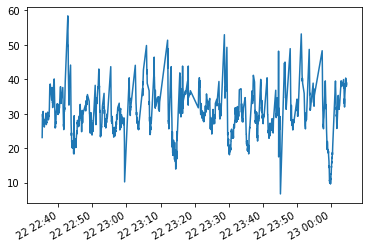

In [718]:
hill_rr2019_speed = hill_rr2019['speed']
hill_rr2019_speed.plot()
hill_rr2019_speed.describe()

From the speed data above, we can see some possible outliers.

count    2256.000000
mean       28.720264
std         5.607205
min        14.710679
25%        25.298743
50%        28.561045
75%        32.056219
max        42.937879
Name: speed, dtype: float64

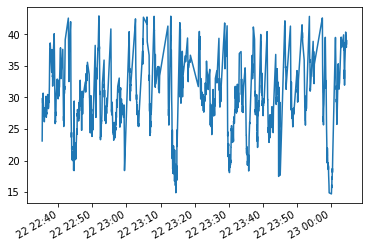

In [736]:
#converting dictionary to an array
result = hill_rr2019_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_hill_rr2019_speed = np.percentile(hill_rr2019_speed, 25, interpolation = 'midpoint')
Q3_hill_rr2019_speed = np.percentile(hill_rr2019_speed, 75, interpolation = 'midpoint')
IQR_hill_rr2019_speed = Q3_hill_rr2019_speed - Q1_hill_rr2019_speed

# drop values
hill_rr2019_speed_drop = hill_rr2019_speed.drop(hill_rr2019_speed.index[(hill_rr2019['speed'] < (Q1_hill_rr2019_speed-1.5*IQR_hill_rr2019_speed)) | (hill_rr2019['speed'] > (Q3_hill_rr2019_speed+1.5*IQR_hill_rr2019_speed))])

# show descriptive stats with removed outliers
hill_rr2019_speed_drop.plot()
hill_rr2019_speed_drop.describe()

In [725]:
print("From the cleaned data, we can determine:")
print("    Average Speed: " + str(hill_rr2019_speed_drop.mean()) + " KMPH.")
print("    Max Speed: " + str(max(hill_rr2019_speed_drop)) + " KMPH.")
print("    Min Speed: " + str(min(hill_rr2019_speed_drop)) + " KMPH.")

From the cleaned data, we can determine:
    Average Speed: 28.720264237941016 KMPH.
    Max Speed: 42.93787853684969 KMPH.
    Min Speed: 14.710678755711887 KMPH.


#### Down-hills

count    1723.000000
mean       -0.398027
std         0.295881
min        -2.000000
25%        -0.400000
50%        -0.200000
75%        -0.200000
max        -0.200000
Name: elevation_gain, dtype: float64

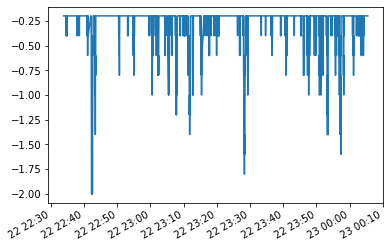

In [738]:
# calculate negative elevation gain value of 3% gradient
eg_value_rr2019_neg = (-1) * (eg_value_rr2016)
# drop values surrounding elevation gain value
dhill_rr2019 = rr_2019.drop( rr_2019.index[(rr_2019['elevation_gain'] >= eg_value_rr2019_neg)])
dhill_rr2019['elevation_gain'].plot()
dhill_rr2019['elevation_gain'].describe()

count    464.000000
mean      44.880480
std        7.580391
min       26.076127
25%       39.863010
50%       44.339202
75%       49.856694
max       67.862011
Name: speed, dtype: float64

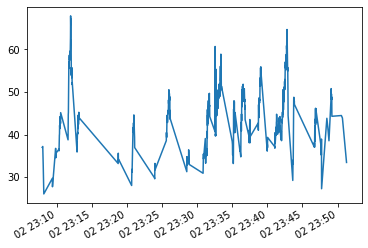

In [739]:
dhill_rr2019_speed = dhill_tt2016['speed']
dhill_rr2019_speed.plot()
dhill_rr2019_speed.describe()

Although the data set did have some spikes in values, they are inline with the trends surrounding it and aren't unrealistic. The following can be found from this data:

In [745]:
print("    Average Speed: " + str(dhill_rr2019_speed.mean()) + " KMPH.")
print("    Max Speed: " + str(max(dhill_rr2019_speed)) + " KMPH.")
print("    Min Speed: " + str(min(dhill_rr2019_speed)) + " KMPH.")

    Average Speed: 44.8804796905693 KMPH.
    Max Speed: 67.86201094032148 KMPH.
    Min Speed: 26.076126618752035 KMPH.


### RR 2019 Summary

In [746]:
print("On the flats:")
print("    Average Speed: " + str(flat_rr2019_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(flat_rr2019_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(flat_rr2019_speed_dropped)) + " KMPH.")
print("On the hills:")
print("    Average Speed: " + str(hill_rr2019_speed_drop.mean()) + " KMPH.")
print("    Max Speed: " + str(max(hill_rr2019_speed_drop)) + " KMPH.")
print("    Min Speed: " + str(min(hill_rr2019_speed_drop)) + " KMPH.")
print("On the down-hills:")
print("    Average Speed: " + str(dhill_rr2019_speed.mean()) + " KMPH.")
print("    Max Speed: " + str(max(dhill_rr2019_speed)) + " KMPH.")
print("    Min Speed: " + str(min(dhill_rr2019_speed)) + " KMPH.")

On the flats:
    Average Speed: 33.36306594284277 KMPH.
    Max Speed: 47.77780372135276 KMPH.
    Min Speed: 18.732862347401518 KMPH.
On the hills:
    Average Speed: 28.720264237941016 KMPH.
    Max Speed: 42.93787853684969 KMPH.
    Min Speed: 14.710678755711887 KMPH.
On the down-hills:
    Average Speed: 44.8804796905693 KMPH.
    Max Speed: 67.86201094032148 KMPH.
    Min Speed: 26.076126618752035 KMPH.


## Time Trial 2019

In [749]:
print("Taken the average speed of the 2019 TT race was " +  str(tt_2019_speed.mean()) + " KMPH, and a 3% climb is 1.35 degrees. We have taken assumption that each gps data-point is created every second, from this we can find the following:")

Taken the average speed of the 2019 TT race was 33.05782378815691 KMPH, and a 3% climb is 1.35 degrees. We have taken assumption that each gps data-point is created every second, from this we can find the following:


In [750]:
# Re-define values for simplicity
ave_sped_tt2019 = tt_2019_speed.mean()
# take average speed of the ride in kmph and convert to kmps (per second)
kmps_tt2019 = (ave_sped_tt2019/60)/60
# take kmps value and put into a = c × sin(α) equation
eg_value_tt2019 = (kmps_tt2019 * (math.sin(math.radians(1.35))))
print("Value of elevation gain of 3% gradient: " + str(eg_value_tt2019) + " at an average speed of: " + str(ave_sped_tt2019) + " KMPH.")

Value of elevation gain of 3% gradient: 0.000216342931766639 at an average speed of: 33.05782378815691 KMPH.


### Flats

+/- value for flat conditions: 0.000216342931766639


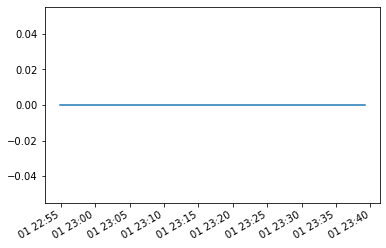

In [751]:
# calculate negative elevation gain value of 3% gradient
eg_value_tt2019_neg = (-1) * (eg_value_tt2019)
# drop values surrounding elevation gain value
flat_tt2019 = tt_2019.drop( tt_2019.index[(tt_2019['elevation_gain'] <= eg_value_tt2019_neg) | (tt_2019['elevation_gain'] >= eg_value_tt2019)])
flat_tt2019['elevation_gain'].plot()
flat_tt2019['elevation_gain'].describe()
print("+/- value for flat conditions: " + str(eg_value_tt2019))

count    744.000000
mean      33.295912
std        6.592087
min        0.000000
25%       29.165850
50%       33.717567
75%       36.987120
max       56.423511
Name: speed, dtype: float64

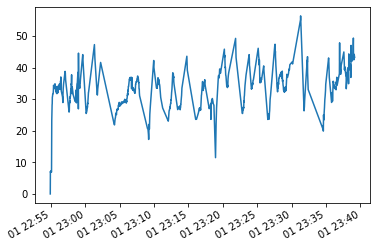

In [752]:
flat_tt2019_speed = flat_tt2019['speed']
flat_tt2019_speed.plot()
flat_tt2019_speed.describe()

From the plot above, we suspect there are a few outliers

count    727.000000
mean      33.636337
std        5.546442
min       18.562020
25%       29.390247
50%       33.759914
75%       36.995051
max       48.110663
Name: speed, dtype: float64

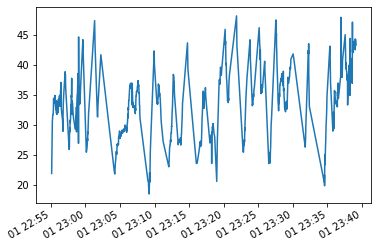

In [753]:
#converting dictionary to an array
result = flat_tt2019_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_flat_tt2019_speed = np.percentile(flat_tt2019_speed, 25, interpolation = 'midpoint')
Q3_flat_tt2019_speed = np.percentile(flat_tt2019_speed, 75, interpolation = 'midpoint')
IQR_flat_tt2019_speed = Q3_flat_tt2019_speed - Q1_flat_tt2019_speed

# drop values
flat_tt2019_speed_drop = flat_tt2019.drop(flat_tt2019_speed.index[(flat_tt2019['speed'] < (Q1_flat_tt2019_speed-1.5*IQR_flat_tt2019_speed)) | (flat_tt2019['speed'] > (Q3_flat_tt2019_speed+1.5*IQR_flat_tt2019_speed))])

# show descriptive stats with removed outliers
flat_tt2019_speed_dropped = flat_tt2019_speed_drop['speed']
flat_tt2019_speed_dropped.plot()
flat_tt2019_speed_dropped.describe()

In [754]:
print("From the cleaned data, the following has been calculated:")
print("    Average Speed: " + str(flat_tt2019_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(flat_tt2019_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(flat_tt2019_speed_dropped)) + " KMPH.")

From the cleaned data, the following has been calculated:
    Average Speed: 33.636336790041184 KMPH.
    Max Speed: 48.11066273787553 KMPH.
    Min Speed: 18.56202016392853 KMPH.


### Hills

count    1114.000000
mean        0.259246
std         0.097451
min         0.200000
25%         0.200000
50%         0.200000
75%         0.400000
max         0.600000
Name: elevation_gain, dtype: float64

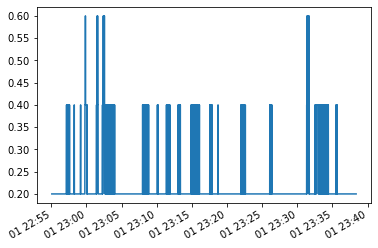

In [756]:
# calculate negative elevation gain value of 3% gradient
eg_value_tt2019_neg = (-1) * (eg_value_tt2019)
# drop values surrounding elevation gain value
hill_tt2019 = tt_2019.drop( tt_2019.index[(tt_2019['elevation_gain'] <= eg_value_tt2019)])
hill_tt2019['elevation_gain'].plot()
hill_tt2019['elevation_gain'].describe()

count    1114.000000
mean       26.025625
std         6.725204
min         7.075658
25%        20.882749
50%        26.117133
75%        30.429089
max        50.451117
Name: speed, dtype: float64

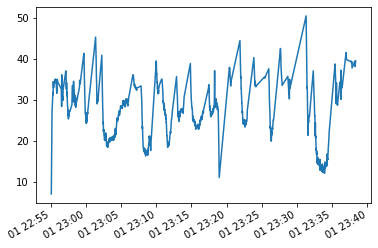

In [757]:
hill_tt2019_speed = hill_tt2019['speed']
hill_tt2019_speed.plot()
hill_tt2019_speed.describe()

From the speed data, we can visually detect some outliers

count    1109.000000
mean       25.929868
std         6.585550
min         7.075658
25%        20.839831
50%        26.099592
75%        30.325589
max        44.453626
Name: speed, dtype: float64

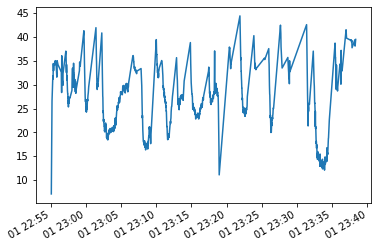

In [758]:
#converting dictionary to an array
result = hill_tt2019_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_hill_tt2019_speed = np.percentile(hill_tt2019_speed, 25, interpolation = 'midpoint')
Q3_hill_tt2019_speed = np.percentile(hill_tt2019_speed, 75, interpolation = 'midpoint')
IQR_hill_tt2019_speed = Q3_hill_tt2019_speed - Q1_hill_tt2019_speed

# drop values
hill_tt2019_speed_drop = hill_tt2019_speed.drop(hill_tt2019_speed.index[(hill_tt2019['speed'] < (Q1_hill_tt2019_speed-1.5*IQR_hill_tt2019_speed)) | (hill_tt2019['speed'] > (Q3_hill_tt2019_speed+1.5*IQR_hill_tt2019_speed))])

# show descriptive stats with removed outliers
hill_tt2019_speed_drop.plot()
hill_tt2019_speed_drop.describe()

In [759]:
print("From the cleaned data, we can determine:")
print("    Average Speed: " + str(hill_tt2019_speed_drop.mean()) + " KMPH.")
print("    Max Speed: " + str(max(hill_tt2019_speed_drop)) + " KMPH.")
print("    Min Speed: " + str(min(hill_tt2019_speed_drop)) + " KMPH.")

From the cleaned data, we can determine:
    Average Speed: 25.929867720275805 KMPH.
    Max Speed: 44.45362643253328 KMPH.
    Min Speed: 7.075657790964378 KMPH.


### Down-hills

count    797.000000
mean      -0.361104
std        0.243803
min       -1.600000
25%       -0.400000
50%       -0.200000
75%       -0.200000
max       -0.200000
Name: elevation_gain, dtype: float64

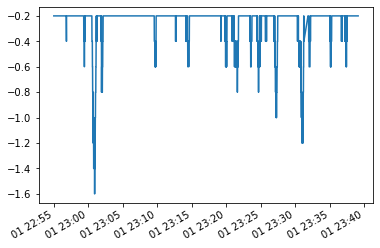

In [761]:
# calculate negative elevation gain value of 3% gradient
eg_value_tt2019_neg = (-1) * (eg_value_tt2019)
# drop values surrounding elevation gain value
dhill_tt2019 = tt_2019.drop( tt_2019.index[(tt_2019['elevation_gain'] >= eg_value_tt2019_neg)])
dhill_tt2019['elevation_gain'].plot()
dhill_tt2019['elevation_gain'].describe()

count    797.000000
mean      42.664764
std        7.281034
min        7.075657
25%       37.436538
50%       42.454981
75%       46.835303
max       63.300734
Name: speed, dtype: float64

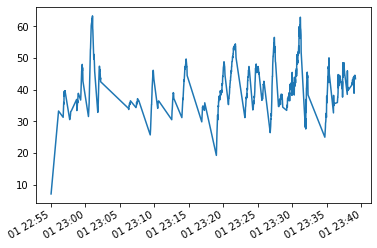

In [762]:
dhill_tt2019_speed = dhill_tt2019['speed']
dhill_tt2019_speed.plot()
dhill_tt2019_speed.describe()

From the data above, we can detect some outliers

count    785.000000
mean      42.491980
std        6.829225
min       24.166727
25%       37.378040
50%       42.262004
75%       46.705103
max       60.854126
Name: speed, dtype: float64

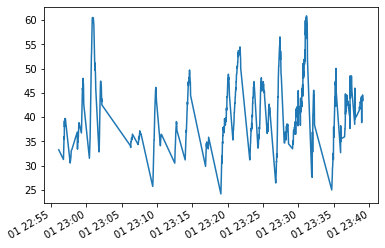

In [763]:
#converting dictionary to an array
result = dhill_tt2019_speed.items()
data = list(result)
numpyArray = np.array(data)

#calculating the IQR
Q1_dhill_tt2019_speed = np.percentile(dhill_tt2019_speed, 25, interpolation = 'midpoint')
Q3_dhill_tt2019_speed = np.percentile(dhill_tt2019_speed, 75, interpolation = 'midpoint')
IQR_dhill_tt2019_speed = Q3_dhill_tt2019_speed - Q1_dhill_tt2019_speed

# drop values
dhill_tt2019_speed_drop = dhill_tt2019.drop(dhill_tt2019_speed.index[(dhill_tt2019['speed'] < (Q1_dhill_tt2019_speed-1.5*IQR_dhill_tt2019_speed)) | (dhill_tt2019['speed'] > (Q3_dhill_tt2019_speed+1.5*IQR_dhill_tt2019_speed))])

# show descriptive stats with removed outliers
dhill_tt2019_speed_dropped = dhill_tt2019_speed_drop['speed']
dhill_tt2019_speed_dropped.plot()
dhill_tt2019_speed_dropped.describe()

In [765]:
print("From the cleaned data, we can determine:")
print("    Average Speed: " + str(dhill_tt2019_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(dhill_tt2019_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(dhill_tt2019_speed_dropped)) + " KMPH.")

From the cleaned data, we can determine:
    Average Speed: 42.49198016598959 KMPH.
    Max Speed: 60.85412594450084 KMPH.
    Min Speed: 24.166727288437304 KMPH.


## TT 2019 Summary

In [766]:
print("On the flats:")
print("    Average Speed: " + str(flat_tt2019_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(flat_tt2019_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(flat_tt2019_speed_dropped)) + " KMPH.")
print("On the hills:")
print("    Average Speed: " + str(hill_tt2019_speed_drop.mean()) + " KMPH.")
print("    Max Speed: " + str(max(hill_tt2019_speed_drop)) + " KMPH.")
print("    Min Speed: " + str(min(hill_tt2019_speed_drop)) + " KMPH.")
print("On the down-hills:")
print("    Average Speed: " + str(dhill_tt2019_speed_dropped.mean()) + " KMPH.")
print("    Max Speed: " + str(max(dhill_tt2019_speed_dropped)) + " KMPH.")
print("    Min Speed: " + str(min(dhill_tt2019_speed_dropped)) + " KMPH.")

On the flats:
    Average Speed: 33.636336790041184 KMPH.
    Max Speed: 48.11066273787553 KMPH.
    Min Speed: 18.56202016392853 KMPH.
On the hills:
    Average Speed: 25.929867720275805 KMPH.
    Max Speed: 44.45362643253328 KMPH.
    Min Speed: 7.075657790964378 KMPH.
On the down-hills:
    Average Speed: 42.49198016598959 KMPH.
    Max Speed: 60.85412594450084 KMPH.
    Min Speed: 24.166727288437304 KMPH.


## Summary and comparisons of the different stages of the rides

In [776]:
print("RR 2016")
print("    On the Flats:")
print("        Average Speed: " + str(flat_rr2016_speed_dropped.mean()) + " KMPH.")
print("        Max Speed: " + str(max(flat_rr2016_speed_dropped)) + " KMPH.")
print("        Min Speed: " + str(min(flat_rr2016_speed_dropped)) + " KMPH.")
print("    On the Hills:")
print("        Average Speed: " + str(hills_rr2016_speed_dropped.mean()) + " KMPH.")
print("        Max Speed: " + str(max(hills_rr2016_speed_dropped)) + " KMPH.")
print("        Min Speed: " + str(min(hills_rr2016_speed_dropped)) + " KMPH.")
print("        Average Speed: " + str(dhill_rr2016_speed_dropped.mean()) + " KMPH.")
print("    On the Down Hills:")
print("        Average Speed: " + str(dhill_tt2016_speed_dropped.mean()) + " KMPH.")
print("        Max Speed: " + str(max(dhill_rr2016_speed_dropped)) + " KMPH.")
print("        Min Speed: " + str(min(dhill_rr2016_speed_dropped)) + " KMPH.")
print("TT 2016")
print("    On the flats:")
print("        Average Speed: " + str(flat_tt2016_speed_dropped.mean()) + " KMPH.")
print("        Max Speed: " + str(max(flat_tt2016_speed_dropped)) + " KMPH.")
print("        Min Speed: " + str(min(flat_tt2016_speed_dropped)) + " KMPH.")
print("    On the hills:")
print("        Average Speed: " + str(hill_tt2016_speed.mean()) + " KMPH.")
print("        Max Speed: " + str(max(hill_tt2016_speed)) + " KMPH.")
print("        Min Speed: " + str(min(hill_tt2016_speed)) + " KMPH.")
print("    On the down-hills:")
print("        Average Speed: " + str(dhill_tt2016_speed_dropped.mean()) + " KMPH.")
print("        Max Speed: " + str(max(dhill_tt2016_speed_dropped)) + " KMPH.")
print("        Min Speed: " + str(min(dhill_tt2016_speed_dropped)) + " KMPH.")
print("RR 2019")
print("    On the flats:")
print("        Average Speed: " + str(flat_rr2019_speed_dropped.mean()) + " KMPH.")
print("        Max Speed: " + str(max(flat_rr2019_speed_dropped)) + " KMPH.")
print("        Min Speed: " + str(min(flat_rr2019_speed_dropped)) + " KMPH.")
print("    On the hills:")
print("        Average Speed: " + str(hill_rr2019_speed_drop.mean()) + " KMPH.")
print("        Max Speed: " + str(max(hill_rr2019_speed_drop)) + " KMPH.")
print("        Min Speed: " + str(min(hill_rr2019_speed_drop)) + " KMPH.")
print("    On the down-hills:")
print("        Average Speed: " + str(dhill_rr2019_speed.mean()) + " KMPH.")
print("        Max Speed: " + str(max(dhill_rr2019_speed)) + " KMPH.")
print("        Min Speed: " + str(min(dhill_rr2019_speed)) + " KMPH.")
print("TT 2019")
print("    On the flats:")
print("        Average Speed: " + str(flat_tt2019_speed_dropped.mean()) + " KMPH.")
print("        Max Speed: " + str(max(flat_tt2019_speed_dropped)) + " KMPH.")
print("        Min Speed: " + str(min(flat_tt2019_speed_dropped)) + " KMPH.")
print("    On the hills:")
print("        Average Speed: " + str(hill_tt2019_speed_drop.mean()) + " KMPH.")
print("        Max Speed: " + str(max(hill_tt2019_speed_drop)) + " KMPH.")
print("        Min Speed: " + str(min(hill_tt2019_speed_drop)) + " KMPH.")
print("    On the down-hills:")
print("        Average Speed: " + str(dhill_tt2019_speed_dropped.mean()) + " KMPH.")
print("        Max Speed: " + str(max(dhill_tt2019_speed_dropped)) + " KMPH.")
print("        Min Speed: " + str(min(dhill_tt2019_speed_dropped)) + " KMPH.")

RR 2016
    On the Flats:
        Average Speed: 34.448524637164795 KMPH.
        Max Speed: 52.90753097862545 KMPH.
        Min Speed: 15.538749630199455 KMPH.
    On the Hills:
        Average Speed: 26.13878972018131 KMPH.
        Max Speed: 39.688225359814105 KMPH.
        Min Speed: 12.711392779957256 KMPH.
        Average Speed: 45.48861835603259 KMPH.
    On the Down Hills:
        Average Speed: 44.73695040511291 KMPH.
        Max Speed: 62.306415026536556 KMPH.
        Min Speed: 30.089641803251865 KMPH.
TT 2016
    On the flats:
        Average Speed: 34.58014586006729 KMPH.
        Max Speed: 50.08136855806054 KMPH.
        Min Speed: 18.460497432342034 KMPH.
    On the hills:
        Average Speed: 24.582851769382092 KMPH.
        Max Speed: 44.092617380522015 KMPH.
        Min Speed: 9.768391461204546 KMPH.
    On the down-hills:
        Average Speed: 44.73695040511291 KMPH.
        Max Speed: 64.67008549271821 KMPH.
        Min Speed: 26.076126618752035 KMPH.
RR 2019
   

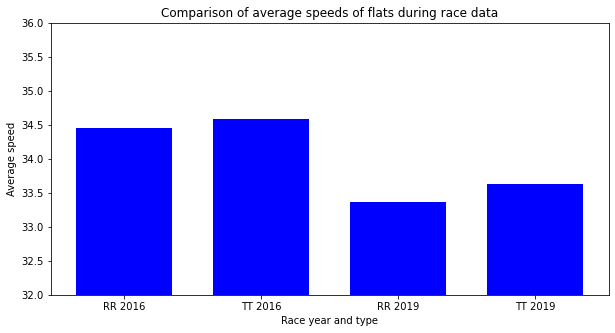

In [772]:
# creating the dataset
data = {'RR 2016':flat_rr2016_speed_dropped.mean(), 'TT 2016':flat_tt2016_speed_dropped.mean() , 'RR 2019':flat_rr2019_speed_dropped.mean(),
        'TT 2019':flat_tt2019_speed_dropped.mean()}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.7)
plt.ylim(32, 36)
 
plt.xlabel("Race year and type")
plt.ylabel("Average speed")
plt.title("Comparison of average speeds of flats during race data")
plt.show()

From this comparison graph of average speeds on the flats, we can see the following:
1. Time Trials performed faster in this area than Road Races
2. Races in 2016 performed faster than races in 2019

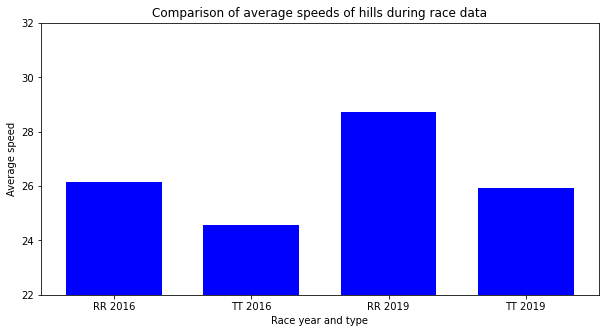

In [775]:
# creating the dataset
data = {'RR 2016':hills_rr2016_speed_dropped.mean(),
        'TT 2016':hill_tt2016_speed.mean(), 
        'RR 2019':hill_rr2019_speed_drop.mean(),
        'TT 2019':hill_tt2019_speed_drop.mean()}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.7)
plt.ylim(22, 32)
 
plt.xlabel("Race year and type")
plt.ylabel("Average speed")
plt.title("Comparison of average speeds of hills during race data")
plt.show()

From the graph of average speeds on the uphill sections we can see:
1. TT races performed sigificantly worse when compaired to Road Races
2. The Road Race in 2019 had a much higher average speed than the other three races
3. Races in 2019 performed better on the up-hill sections of the race compaired to their 2016 counterparts.

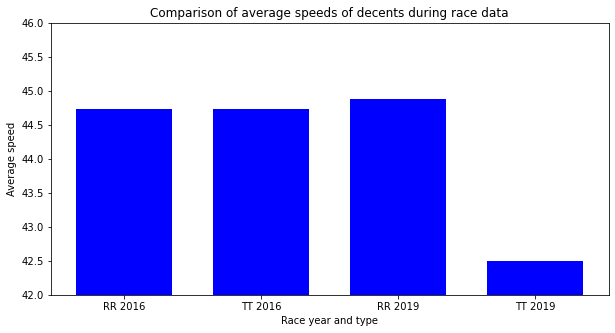

In [780]:
# creating the dataset
data = {'RR 2016':dhill_tt2016_speed_dropped.mean(),
        'TT 2016':dhill_tt2016_speed_dropped.mean(), 
        'RR 2019':dhill_rr2019_speed.mean(),
        'TT 2019':dhill_tt2019_speed_dropped.mean()}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.7)
plt.ylim(42, 46)
 
plt.xlabel("Race year and type")
plt.ylabel("Average speed")
plt.title("Comparison of average speeds of decents during race data")
plt.show()

From the comparative bar chart on average speeds during the decent sections of the races, we can see:
1. The Time Trial race in 2019 was significantly slower than the other 3 races
2. Races in 2016, on average, were fast than their 2019 counterparts
3. Road Races saw higher average speeds on the decents compaired to their Time Trial counterparts

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.



